<a href="https://colab.research.google.com/github/sreedharsiddhu/Big-Data-open-university-learning-analytics-data-set-/blob/main/FSF_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries
import os  # Operating system module
import warnings  # Warnings module
import pandas as pd  # Pandas for data manipulation
import numpy as np  # Numpy for numerical computations
import seaborn as sns  # Seaborn for data visualization
import matplotlib.pyplot as plt  # Matplotlib for plotting
from sklearn import metrics  # Metrics module from scikit-learn
from sklearn.decomposition import PCA  # Principal Component Analysis from scikit-learn
from imblearn.over_sampling import SMOTE  # SMOTE for oversampling
from sklearn.feature_selection import RFE  # Recursive Feature Elimination from scikit-learn
from sklearn.model_selection import KFold, train_test_split, RandomizedSearchCV, GridSearchCV, cross_validate  # Cross-validation utilities from scikit-learn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_squared_error, mean_absolute_error, auc, roc_auc_score, roc_curve, recall_score  # Various evaluation metrics from scikit-learn
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Preprocessing utilities from scikit-learn
from sklearn.linear_model import LogisticRegression  # Logistic Regression model from scikit-learn
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Random Forest and Gradient Boosting classifiers from scikit-learn
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier from scikit-learn
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Variance Inflation Factor from statsmodels

# Suppress warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_rows', 100)  # Maximum number of rows to display
pd.set_option('display.max_columns', 400)  # Maximum number of columns to display

# IMPORTING DATA

In [2]:
# Function to load a file from the specified path
# Parameters:
# - path: path from where the file should be loaded

def load_file(path):
    # Check if the file exists
    if os.path.isfile(path):
        # Read the CSV file
        data = pd.read_csv(path)
        # Replace '?' with NaN
        data = data.replace('?', np.nan)

        # Print basic information about the dataset
        print("\nNumber of rows in data are %s" % len(data))
        print("Number of columns in data are %s\n" % len(data.columns))
        print("Following are the data types of columns:")
        print(data.dtypes)
        print("Number of missing values in the data are:")
        print(data.isnull().sum())
        print("Data import is complete")

        return data
    else:
        print(path + " does not exist. Enter the correct path")


# Generalized function to plot counts
# Parameters:
# - rotx: rotation of ticks on x-axis
# - roty: rotation of ticks on y-axis
# - fontx: font size of ticks on x-axis
# - fonty: font size of ticks on y-axis
# - column_name: name of the column for which we need the count
# - data_name: dataframe used for plotting
# - plot_size: size of the plot
# - hue: if second column is needed for getting the count, hue is True else False
# - hue_column_name: second column for plotting

def countplot(rotx, roty, fontx, fonty, column_name, data_name, plot_size=(10, 5), hue=False, hue_column_name=None):
    plt.figure(figsize=plot_size)
    plt.xticks(rotation=rotx, fontsize=fontx)
    plt.yticks(rotation=roty, fontsize=fonty)
    sns.set_style("whitegrid")

    if not hue:
        sns.countplot(column_name, data=data_name, palette='husl',
                      order=data_name[column_name].value_counts().index)
    else:
        sns.countplot(column_name, data=data_name,
                      palette='husl', hue=hue_column_name,
                      order=data_name[column_name].value_counts().index)
    sns.despine()


# Function to encode the categorical data columns
# Parameters:
# - df: dataframe
# - column_name_list: list of column names to encode

def categorical_encoding(df, column_name_list=[]):
    for column_name in column_name_list:
        print(df[column_name].unique())
        categorical_columns = pd.get_dummies(df[column_name], prefix=column_name,
                                             prefix_sep='_', drop_first=False)
        df = pd.concat([df, categorical_columns], axis=1)
        df = df.drop(column_name, axis=1)
    return df


# Function to label encode the data
# Parameters:
# - data: dataframe
# - columns_list: list of column names to label encode

def labelEncoder(data, columns_list):
    for col in columns_list:
        encoder = LabelEncoder()
        data[col] = encoder.fit_transform(data[col])
    return data


# Function to plot stacked plot
# Parameters:
# - data: dataframe used for plotting
# - column_one: column one to group by
# - column_two: column two to group by
# - agg_column: column to count numbers

def stacked_plot(data, column_one, column_two, agg_column, plot_size=(10, 5)):
    pal = sns.color_palette("colorblind")
    grouped = data.groupby([column_one, column_two])[agg_column].count()
    grouped = grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
    grouped = grouped.unstack(column_two).fillna(0)
    print(grouped)
    unique_list = list(data[column_two].unique())
    grouped[unique_list].plot(kind='bar', stacked=True, color=pal, figsize=plot_size)

In [3]:
"""LOADING ASSESSMENTS DATA"""

# Using the load_file function to load the assessments data from the specified file path

oulad_assessment = pd.read_csv('/content/assessments.csv')

In [4]:
oulad_assessment.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [5]:
# Filling in the missing values in the 'date' column with the mean of the existing values

mean_date = int(oulad_assessment['date'].astype(float).mean())
oulad_assessment['date'].fillna(mean_date, inplace=True)


In [6]:
### Checking the unique values and types of code_module

oulad_assessment['code_module'].unique()

array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object)

In [7]:
### Checking the unique values and types of assessment_type

oulad_assessment['assessment_type'].unique()

array(['TMA', 'Exam', 'CMA'], dtype=object)

(array([29., 25., 22., 34., 20., 32., 44.]),
 array([ 12.        ,  47.57142857,  83.14285714, 118.71428571,
        154.28571429, 189.85714286, 225.42857143, 261.        ]),
 <BarContainer object of 7 artists>)

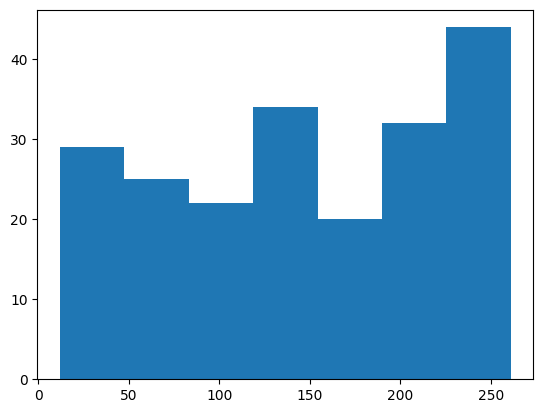

In [8]:
### Below histogram shows us the range for the number for days for final submission.

plt.hist(oulad_assessment['date'].astype(int), bins=7)

In [9]:
"""Loading Courses Data"""

# Using the load_file function to load the courses data from the specified file path

oulad_courses = pd.read_csv('/content/courses.csv')

In [10]:
oulad_courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [11]:
"""Loading Student Assessment Data"""

# Using the load_file function to load the student assessments data from the specified file path

oulad_student_assessment = pd.read_csv('/content/studentAssessment.csv')

In [12]:
### As the number of missing values are very less as compared to the total data

oulad_student_assessment = oulad_student_assessment.dropna()

In [13]:
oulad_student_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [14]:
"""Loading Student Registration Data"""

# Using the load_file function to load the student registration data from the specified file path

oulad_student_registration = load_file('/content/studentRegistration.csv')

# Convert 'date_unregistration' column to '0' if NaN else '1'
oulad_student_registration['date_unregistration'] = ['0' if pd.isnull(days) else '1' for days in oulad_student_registration['date_unregistration']]

# Convert 'date_registration' column to float
oulad_student_registration['date_registration'] = oulad_student_registration['date_registration'].fillna(0).astype(float)

# Fill NaN values in 'date_registration' column with 0
oulad_student_registration['date_registration'] = oulad_student_registration['date_registration'].fillna(0)

# Take absolute values of 'date_registration' column
oulad_student_registration['date_registration'] = oulad_student_registration['date_registration'].apply(abs)



Number of rows in data are 32593
Number of columns in data are 5

Following are the data types of columns:
code_module             object
code_presentation       object
id_student               int64
date_registration      float64
date_unregistration    float64
dtype: object
Number of missing values in the data are:
code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64
Data import is complete


In [15]:
oulad_student_registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,159.0,0
1,AAA,2013J,28400,53.0,0
2,AAA,2013J,30268,92.0,1
3,AAA,2013J,31604,52.0,0
4,AAA,2013J,32885,176.0,0


In [16]:
"""Loading Student Information Data"""

# Using the load_file function to load the student information data from the specified file path

oulad_student_info = load_file('/content/studentInfo.csv')


Number of rows in data are 32593
Number of columns in data are 12

Following are the data types of columns:
code_module             object
code_presentation       object
id_student               int64
gender                  object
region                  object
highest_education       object
imd_band                object
age_band                object
num_of_prev_attempts     int64
studied_credits          int64
disability              object
final_result            object
dtype: object
Number of missing values in the data are:
code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64
Data import is complete


In [17]:
# Print unique values in the 'imd_band' column
print(oulad_student_info['imd_band'].unique())

# Fill NaN values in the 'imd_band' column with the mode value
mode_value = oulad_student_info['imd_band'].mode()[0]
oulad_student_info['imd_band'] = oulad_student_info['imd_band'].fillna(mode_value)


['90-100%' '20-30%' '30-40%' '50-60%' '80-90%' '70-80%' nan '60-70%'
 '40-50%' '10-20' '0-10%']


In [18]:
oulad_student_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [19]:

studentVle_df1 = pd.read_csv('/content/studentVle_0.csv')
studentVle_df2 = pd.read_csv('/content/studentVle_1.csv')
studentVle_df3 = pd.read_csv('/content/studentVle_2.csv')
studentVle_df4 = pd.read_csv('/content/studentVle_3.csv')
studentVle_df5 = pd.read_csv('/content/studentVle_4.csv')
studentVle_df6 = pd.read_csv('/content/studentVle_5.csv')
studentVle_df7 = pd.read_csv('/content/studentVle_6.csv')
studentVle_df8 = pd.read_csv('/content/studentVle_7.csv')

In [20]:
oulad_student_vle = pd.concat([studentVle_df1,studentVle_df2, studentVle_df3, studentVle_df4, studentVle_df5, studentVle_df6, studentVle_df7, studentVle_df8])


In [21]:
oulad_student_vle.head()

,Unnamed: 0,code_module,code_presentation,id_student,id_site,date,sum_click
0,0,AAA,2013J,28400,546652,-10,4
1,1,AAA,2013J,28400,546652,-10,1
2,2,AAA,2013J,28400,546652,-10,1
3,3,AAA,2013J,28400,546614,-10,11
4,4,AAA,2013J,28400,546714,-10,1


In [22]:
"""Loading VLE data"""

# Using the load_file function to load the learning environment data from the specified file path

oulad_vle = pd.read_csv('/content/vle.csv')

In [23]:
# Dropping columns with a high percentage of missing values

# Remove the 'week_from' and 'week_to' columns from the 'oulad_vle' DataFrame
# as they have close to 80% missing values
oulad_vle = oulad_vle.drop(['week_from', 'week_to'], axis=1)

In [24]:
oulad_vle.head()

,id_site,code_module,code_presentation,activity_type
0,546943,AAA,2013J,resource
1,546712,AAA,2013J,oucontent
2,546998,AAA,2013J,resource
3,546888,AAA,2013J,url
4,547035,AAA,2013J,resource


# MERGING DATA

#### In this step we will merge different dataframe which we loaded in the previous steps. Based on the database schema we will
#### join the different tables

Database schema.png![image.png](attachment:image.png)

###### In the first step I am merging studentVle table with the vle table. This can show us about the interactions of students with VLE.

In [25]:
# Merging Student VLE Data with VLE Data

# Merge the student VLE data with the VLE data based on the specified columns
student_vle_merge_vle = oulad_student_vle.merge(oulad_vle,
                                                on=['id_site', 'code_module', 'code_presentation'],
                                                how='left')


In [26]:
# Identifying Interactions Before Course Start

# Filter the merged data to select interactions before the course start for a specific student (id_student = 28400)
# We filter based on two conditions:
# 1. The student ID is 28400.
# 2. The interaction date is before the course start date (date < 0).
# Then, we retrieve the first 10 rows of interactions before the course start for that student.
student_vle_merge_vle[(student_vle_merge_vle['id_student'] == 28400) & (student_vle_merge_vle['date'] < 0)].head(10)



,Unnamed: 0,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type
0,0,AAA,2013J,28400,546652,-10,4,forumng
1,1,AAA,2013J,28400,546652,-10,1,forumng
2,2,AAA,2013J,28400,546652,-10,1,forumng
3,3,AAA,2013J,28400,546614,-10,11,homepage
4,4,AAA,2013J,28400,546714,-10,1,oucontent
5,5,AAA,2013J,28400,546652,-10,8,forumng
6,6,AAA,2013J,28400,546876,-10,2,subpage
7,7,AAA,2013J,28400,546688,-10,15,oucontent
8,8,AAA,2013J,28400,546662,-10,17,oucontent
9,9,AAA,2013J,28400,546890,-10,1,url


In [27]:
# Adding a Column to Indicate Click Timing

# We add a new column 'Click_Timing' to the merged dataframe 'student_vle_merge_vle' to indicate whether
# the interaction occurred before or after the course start date.
# We iterate through each date in the 'date' column, and if the date is less than 0, we assign the value 'Before'
# to the corresponding row in the 'Click_Timing' column. Otherwise, we assign 'After'.
student_vle_merge_vle['Click_Timing'] = ['Before' if date < 0 else 'After' for date in student_vle_merge_vle['date']]


In [28]:
# Creating columns to distinguish clicks before and after the course start date

# For clicks after the course start date, set the 'After_Clicks' column to the total number of clicks
# If the 'Click_Timing' column indicates 'After', use the total number of clicks ('sum_click')
# Otherwise, set it to 0
student_vle_merge_vle['After_Clicks'] = np.where(student_vle_merge_vle['Click_Timing'] == 'After',
                                                 student_vle_merge_vle['sum_click'], 0)

# For clicks before the course start date, set the 'Before_Clicks' column to the total number of clicks
# If the 'Click_Timing' column indicates 'Before', use the total number of clicks ('sum_click')
# Otherwise, set it to 0
student_vle_merge_vle['Before_Clicks'] = np.where(student_vle_merge_vle['Click_Timing'] == 'Before',
                                                  student_vle_merge_vle['sum_click'], 0)


In [29]:
# Grouping the merged dataframe by 'code_module', 'code_presentation', and 'id_student'
# Calculating the sum of clicks, clicks after the course start, and clicks before the course start for each group

student_vle_merge_vle_group = student_vle_merge_vle.groupby(['code_module', 'code_presentation', 'id_student'],
                                                            as_index=False)[['sum_click', 'After_Clicks', 'Before_Clicks']].sum()


In [30]:
student_vle_merge_vle_group.isnull().sum()

code_module          0
code_presentation    0
id_student           0
sum_click            0
After_Clicks         0
Before_Clicks        0
dtype: int64

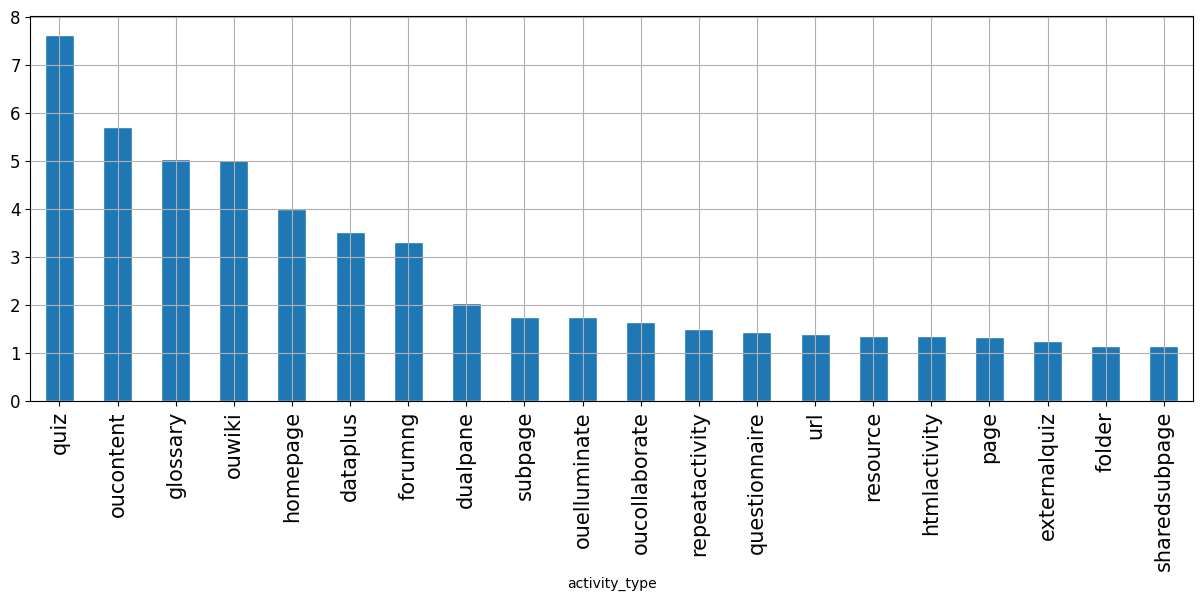

In [31]:
# Plotting the average interaction of students with each activity type
# We can observe that the most interactions are with QUIZ, OUCONTENT, GLOSSARY, and OUWIKI. This is understandable
# as students typically interact with content to learn, use glossary to understand study material, and engage
# in quizzes after completing chapters.

plt.figure(figsize=(15, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")

# Grouping the data by activity type and calculating the mean sum of clicks for each type
activity_mean_clicks = student_vle_merge_vle.groupby('activity_type')['sum_click'].mean().sort_values(ascending=False)

# Plotting the bar chart
activity_mean_clicks.plot(kind='bar')
plt.show()


In [32]:
student_vle_merge_vle.head()

,Unnamed: 0,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,Click_Timing,After_Clicks,Before_Clicks
0,0,AAA,2013J,28400,546652,-10,4,forumng,Before,0,4
1,1,AAA,2013J,28400,546652,-10,1,forumng,Before,0,1
2,2,AAA,2013J,28400,546652,-10,1,forumng,Before,0,1
3,3,AAA,2013J,28400,546614,-10,11,homepage,Before,0,11
4,4,AAA,2013J,28400,546714,-10,1,oucontent,Before,0,1


###### In this step I will merge studentRegistration table with the courses table to understand the related between registrations and length of course

In [33]:
# Merging student registration data with course data based on code_module and code_presentation

student_registration_merge_courses = oulad_student_registration.merge(
    oulad_courses,
    on=['code_module', 'code_presentation'],
    how='left'
)


In [34]:
# Extracting the year from the code_presentation column and creating a new column 'Year'

student_registration_merge_courses['Year'] = student_registration_merge_courses['code_presentation'].str[0:4]

# Extracting the starting month from the code_presentation column and creating a new column 'Starting_Month'
# If the last character of the code_presentation is 'B', the starting month is February, else it's October

student_registration_merge_courses['Starting_Month'] = [
    'February' if code[-1] == 'B' else 'October'
    for code in student_registration_merge_courses['code_presentation']
]


In [35]:
student_registration_merge_courses

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length,Year,Starting_Month
0,AAA,2013J,11391,159.0,0,268,2013,October
1,AAA,2013J,28400,53.0,0,268,2013,October
2,AAA,2013J,30268,92.0,1,268,2013,October
3,AAA,2013J,31604,52.0,0,268,2013,October
4,AAA,2013J,32885,176.0,0,268,2013,October
...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,4.0,0,269,2014,October
32589,GGG,2014J,2645731,23.0,0,269,2014,October
32590,GGG,2014J,2648187,129.0,0,269,2014,October
32591,GGG,2014J,2679821,49.0,1,269,2014,October


In [36]:

# Grouping the dataframe by 'date_unregistration' to analyze differences in 'module_presentation_length'
# Calculating the mean of 'module_presentation_length' for each category ('0' for withdrawn and '1' for completed)
student_registration_merge_courses.groupby('date_unregistration', as_index=False)['module_presentation_length'].mean()


,date_unregistration,module_presentation_length
0,0,256.095378
1,1,255.819500


###### In this step I will merge assessments Table with the studentAssessment Table to understand the relationship between assessment and student performance

In [37]:
# Merging the student assessment data with the assessment data based on the 'id_assessment' column
student_assessment_merge_assessment = oulad_student_assessment.merge(oulad_assessment,
                                                                     on='id_assessment', how='left')


In [38]:
student_assessment_merge_assessment.dtypes

id_assessment          int64
id_student             int64
date_submitted         int64
is_banked              int64
score                float64
code_module           object
code_presentation     object
assessment_type       object
date                 float64
weight               float64
dtype: object

In [39]:
# Check for late submissions
# Iterate through each row in the dataframe to determine if the submission was late or on time
late_submission = []
for i in range(len(student_assessment_merge_assessment)):
    submitted = int(student_assessment_merge_assessment['date_submitted'].iloc[i])
    deadline = int(student_assessment_merge_assessment['date'].iloc[i])
    # If the submission date is after the deadline, mark it as late (0), otherwise mark it as on time (1)
    if submitted > deadline:
        late_submission.append('0')
    else:
        late_submission.append('1')
student_assessment_merge_assessment['Late_submission'] = late_submission



In [40]:
# Calculate the percentage of late submissions from students
late_submissions_percentage = (len(student_assessment_merge_assessment[student_assessment_merge_assessment['Late_submission'] == '0']) / len(student_assessment_merge_assessment)) * 100

# Print the percentage of late submissions
print('Percentage of Late Submissions From Students: ', late_submissions_percentage)

# Explain the observation
print('We can see that approximately 30 percent of students submitted their assignments late.')


Percentage of Late Submissions From Students:  29.958155624240963
We can see that approximately 30 percent of students submitted their assignments late.


Late_submission                          0          1
assessment_type assessment_type                      
CMA             CMA              46.777830  53.222170
Exam            Exam             57.914902  42.085098
TMA             TMA              16.473797  83.526203


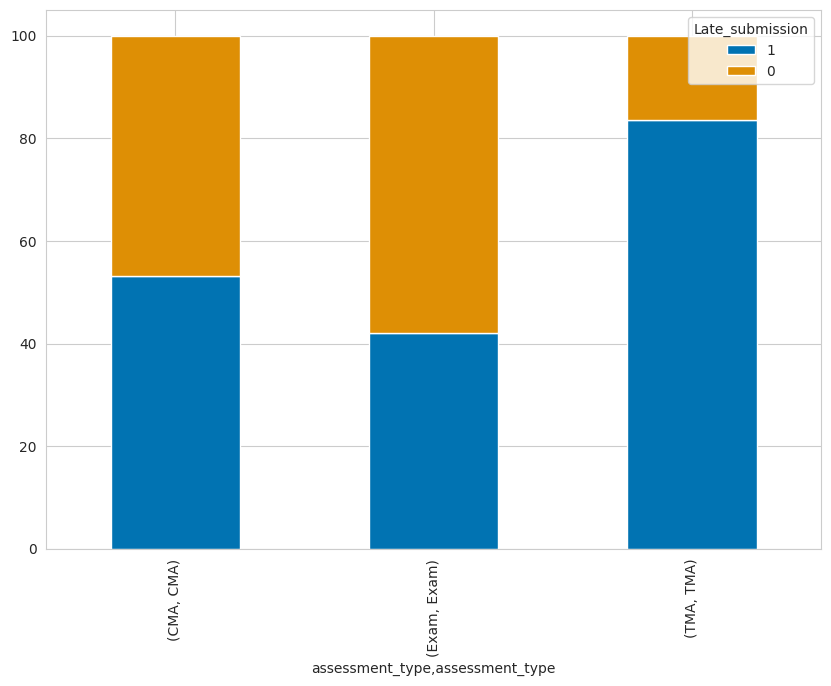

In [41]:
# Plotting the percentage of late submissions by assessment type
# There are three types of assessments: Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA), and Exams.
# This plot illustrates the distribution of late submissions across different assessment types.
# We observe that most of the late submissions are for Final Exam and CMA (Computer Marked Assessment),
# while Tutor Marked Assessments have the least late submissions.

stacked_plot(data=student_assessment_merge_assessment,
             column_one='assessment_type',
             column_two='Late_submission',
             agg_column='id_student',
             plot_size=(10, 7))


Late_submission                  0          1
code_module code_module                      
AAA         AAA          25.810553  74.189447
BBB         BBB          47.472021  52.527979
CCC         CCC          69.063342  30.936658
DDD         DDD          30.566283  69.433717
EEE         EEE          14.544763  85.455237
FFF         FFF          10.345268  89.654732
GGG         GGG          10.049293  89.950707


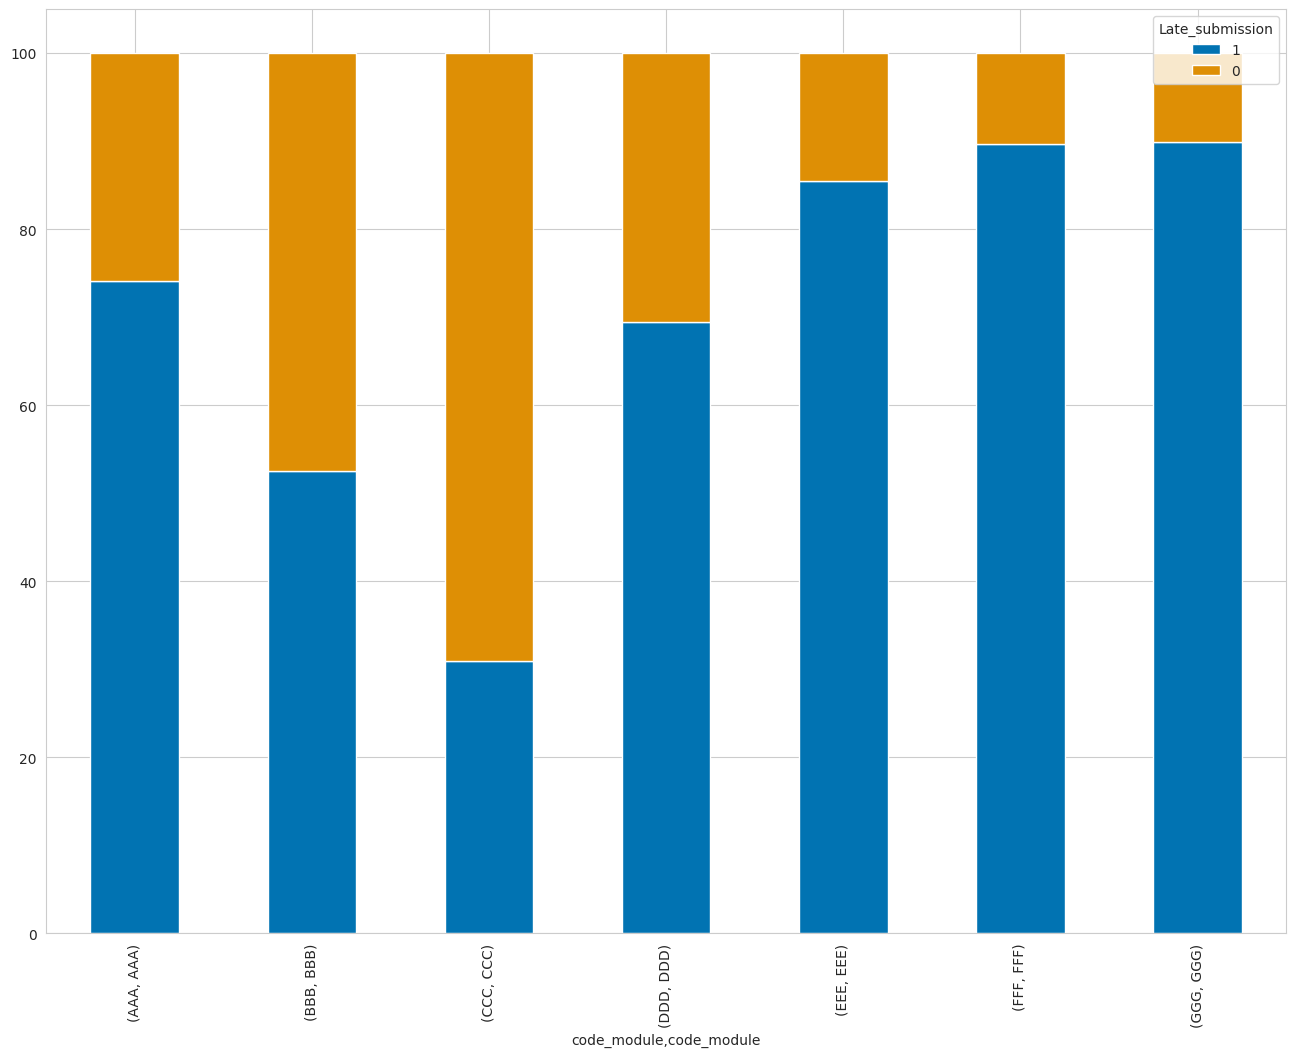

In [42]:
# Plotting the percentage of late submissions by course module
# There are a total of 7 course modules, where 4 belong to STEM (Science, Technology, Engineering, and Mathematics)
# and 3 belong to Social Sciences.
# Social Sciences modules: AAA, BBB, GGG
# STEM modules: CCC, DDD, EEE, FFF
# From the plot, we observe that the highest percentage of late submissions are for Course BBB, CCC, and DDD.

stacked_plot(data=student_assessment_merge_assessment,
             column_one='code_module',
             column_two='Late_submission',
             agg_column='id_student',
             plot_size=(16, 12))


In [43]:
# Creating a column to categorize courses into Social Sciences and STEM fields
# Courses AAA, BBB, and GGG are categorized as Social Sciences, while courses CCC, DDD, EEE, and FFF are categorized as STEM.
# This categorization allows us to analyze the data based on different academic fields.

student_assessment_merge_assessment['Code_Category'] = ['Social_Science' if code in ['AAA', 'BBB', 'GGG']
                                                        else 'STEM' for code in student_assessment_merge_assessment['code_module']]



Late_submission                        0          1
Code_Category  Code_Category                       
STEM           STEM            26.072296  73.927704
Social_Science Social_Science  37.078578  62.921422


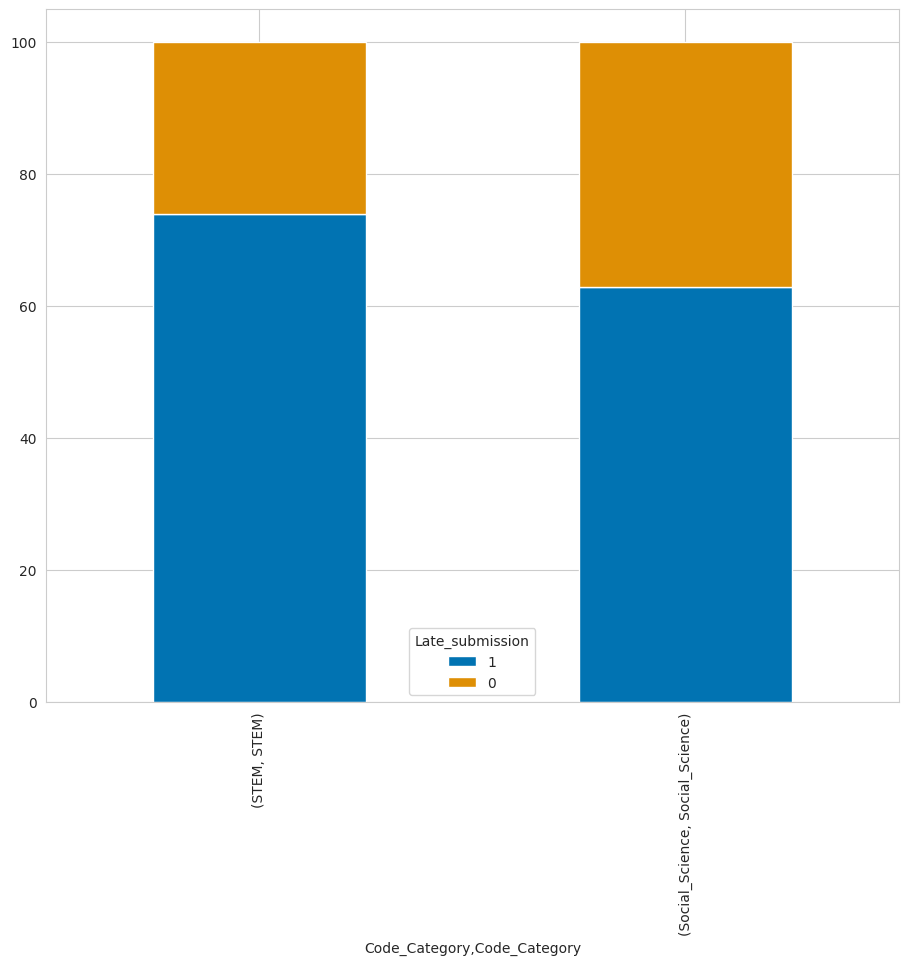

In [44]:
# Plotting the percentage of late submissions for Social Sciences and STEM courses
# We can observe that Social Sciences have a higher percentage of late submissions compared to STEM courses.

stacked_plot(student_assessment_merge_assessment, 'Code_Category', 'Late_submission', 'id_student', plot_size=(11, 9))


In [45]:
# According to the table description, a score less than 40 is considered a fail, and a score of 40 or above is a pass.
# This step adds a new column 'Result' to the dataframe, indicating whether the student passed or failed each assessment.

student_assessment_merge_assessment['Result'] = student_assessment_merge_assessment['score'].apply(lambda score: 'Fail' if int(score) < 40 else 'Pass')


Result                             Fail       Pass
Code_Category  Code_Category                      
STEM           STEM            5.132608  94.867392
Social_Science Social_Science  2.949136  97.050864


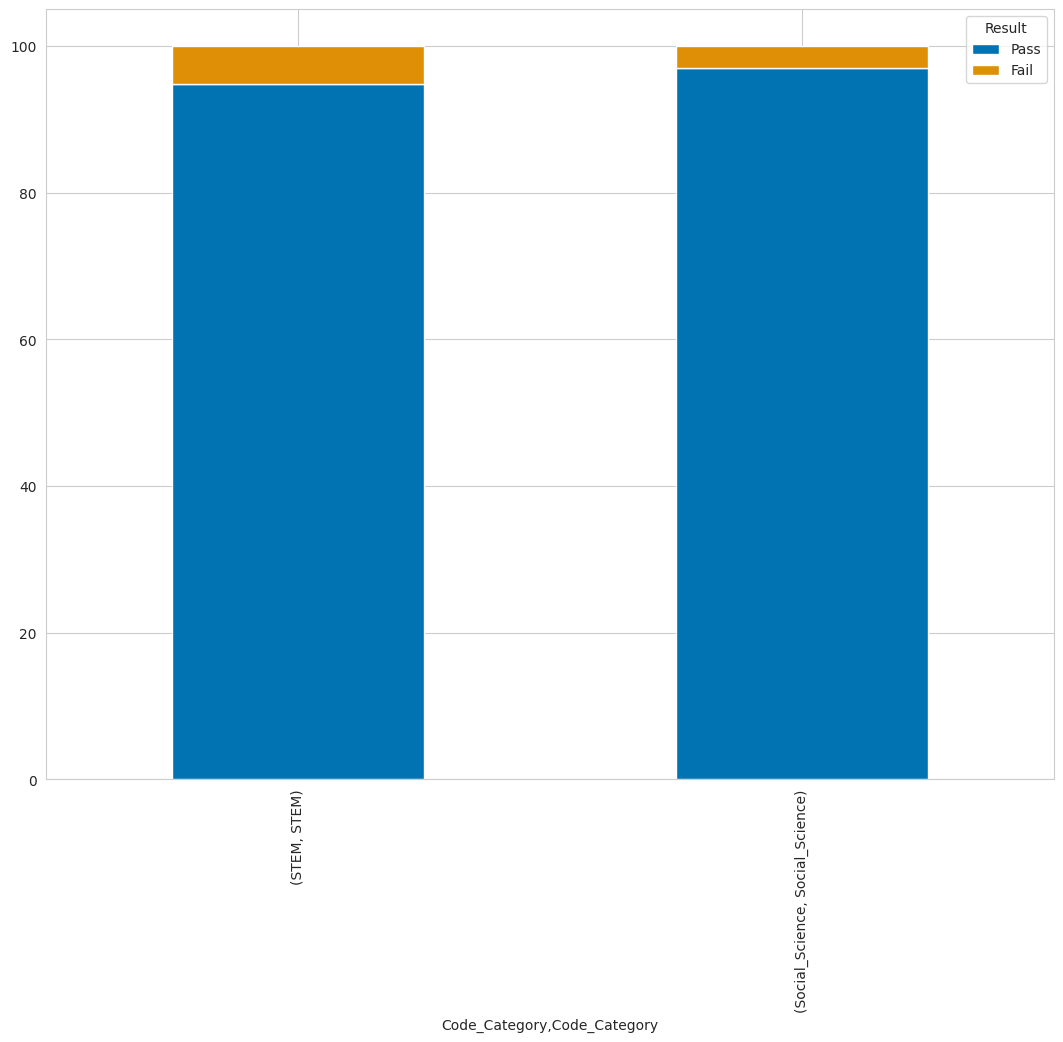

In [46]:
# The following plot illustrates the ratio of pass and fail students.
# This visualization helps to compare the failure rate between STEM and Social Sciences.
# Observing the plot, we can see that the failure rate in STEM courses is higher compared to Social Sciences.

# Generate a stacked plot to compare the pass/fail ratios within each Code_Category (STEM vs Social_Science)
stacked_plot(student_assessment_merge_assessment,
             column_one='Code_Category',  # The primary category for grouping (STEM vs Social_Science)
             column_two='Result',         # The secondary category for grouping (Pass vs Fail)
             agg_column='id_student',     # The column to aggregate/count (student IDs)
             plot_size=(13, 10))           # The size of the plot


Result                       Fail       Pass
code_module code_module                     
AAA         AAA          2.860776  97.139224
BBB         BBB          3.306266  96.693734
CCC         CCC          9.297903  90.702097
DDD         DDD          9.044297  90.955703
EEE         EEE          1.775298  98.224702
FFF         FFF          1.975570  98.024430
GGG         GGG          1.958593  98.041407


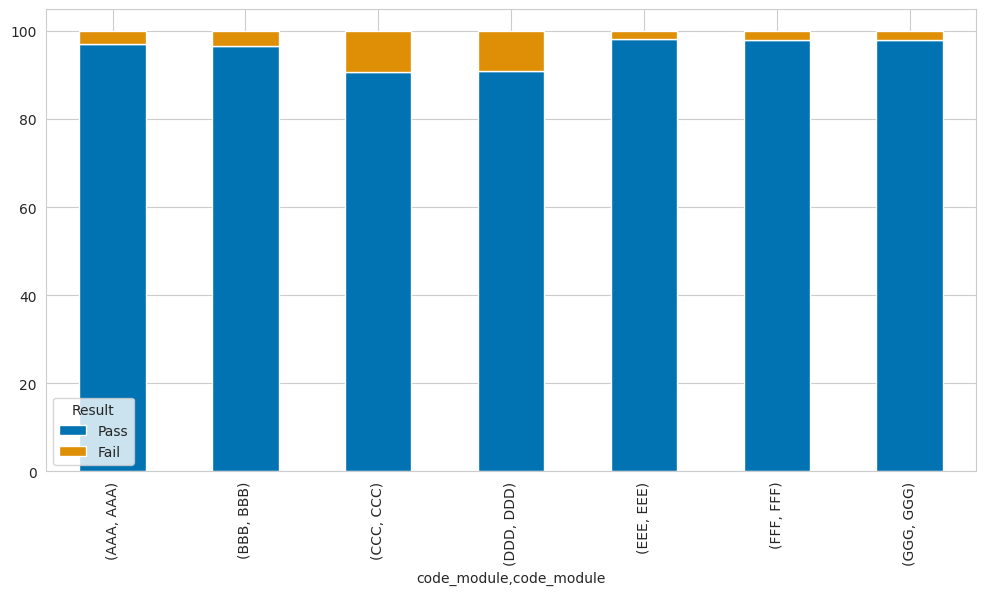

In [47]:
# The following plot shows the failure rate for each course module.
# Observing the plot, we can see that the courses DDD, CCC, and BBB have the highest failure rates.
# Notably, among these three courses, two (DDD and CCC) belong to the STEM category.

# Generate a stacked plot to compare the pass/fail ratios within each course module
stacked_plot(student_assessment_merge_assessment,
             column_one='code_module',  # The primary category for grouping (course modules)
             column_two='Result',       # The secondary category for grouping (Pass vs Fail)
             agg_column='id_student',   # The column to aggregate/count (student IDs)
             plot_size=(12, 6))         # The size of the plot


In [48]:
## Weightage of assignments can impact the submissions and results of students. I categorized the weight into
## Low, Medium, and High Weightage.

# Print unique weight values to understand the range of weights
print(student_assessment_merge_assessment['weight'].unique())

# Initialize an empty list to hold the weight categories
percentage_segment = []

# Iterate through each weight value in the 'weight' column
for percent in student_assessment_merge_assessment['weight']:
    # Classify weight as 'Low_Weightage' if it is less than or equal to 10
    if percent <= 10:
        percentage_segment.append('Low_Weightage')
    # Classify weight as 'Medium_Weightage' if it is greater than 10 but less than or equal to 30
    elif 10 < percent <= 30:
        percentage_segment.append('Medium_Weightage')
    # Classify weight as 'High_Weightage' if it is greater than 30
    else:
        percentage_segment.append('High_Weightage')

# Add the new weight category to the dataframe as a new column 'Weightage'
student_assessment_merge_assessment['Weightage'] = percentage_segment


[ 10.   20.   30.    5.   18.    1.    0.   35.    9.   22.    2.    7.
   8.  100.    7.5  12.5  15.    3.    4.    6.   17.5  25.   16.   28. ]


Result                                 Fail       Pass
Weightage        Weightage                            
High_Weightage   High_Weightage    8.463783  91.536217
Low_Weightage    Low_Weightage     3.329021  96.670979
Medium_Weightage Medium_Weightage  5.307333  94.692667


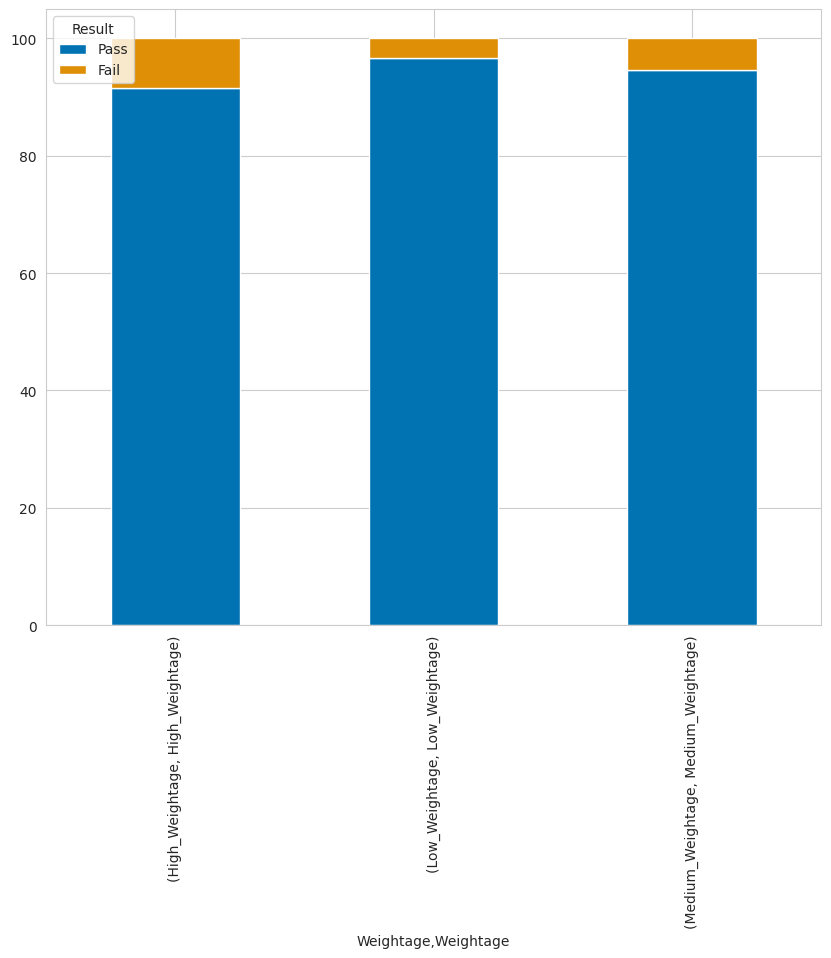

In [49]:
# The following plot shows the failure rate for different weight categories.
# Observing the plot, we can see that Medium and High Weightage Assessments have higher failure rates compared to Low Weightage Assessments.

# Generate a stacked plot to compare the pass/fail ratios within each weight category
stacked_plot(student_assessment_merge_assessment,
             column_one='Weightage',  # The primary category for grouping (weight categories)
             column_two='Result',     # The secondary category for grouping (Pass vs Fail)
             agg_column='id_student', # The column to aggregate/count (student IDs)
             plot_size=(10, 8))        # The size of the plot

Result                               Fail       Pass
Late_submission Late_submission                     
0               0                6.841630  93.158370
1               1                3.301011  96.698989


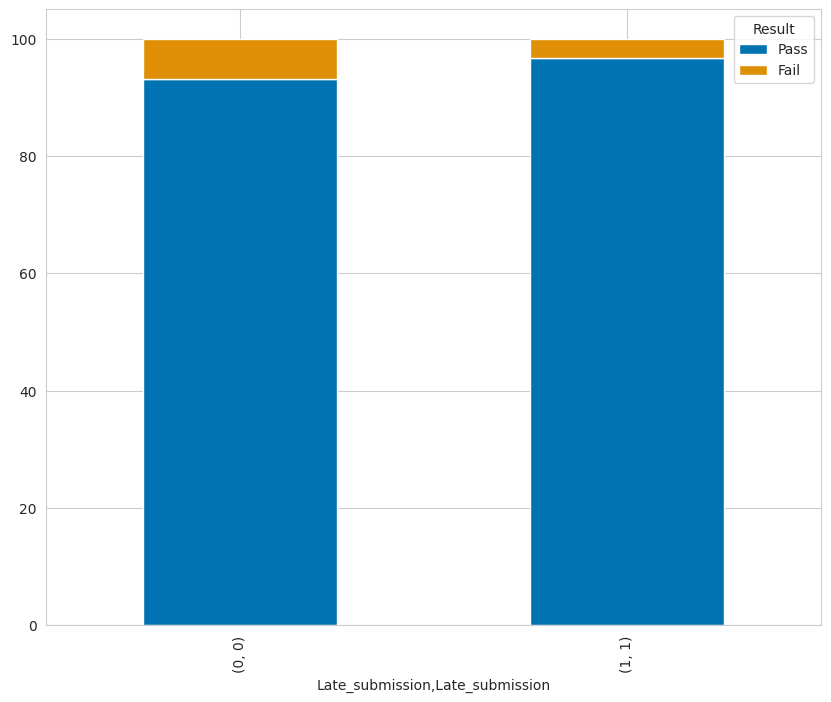

In [50]:
# The following plot shows the ratio of Pass and Fail in relation to Late Submissions.
# Observing the plot, we can clearly see that Late Submissions have a higher Failure Rate compared to on-time submissions.

# Generate a stacked plot to compare the pass/fail ratios within Late Submission categories
stacked_plot(student_assessment_merge_assessment,
             column_one='Late_submission',  # The primary category for grouping (Late vs On-time submission)
             column_two='Result',           # The secondary category for grouping (Pass vs Fail)
             agg_column='id_student',       # The column to aggregate/count (student IDs)
             plot_size=(10, 8))              # The size of the plot


In [51]:
student_assessment_merge_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,Late_submission,Code_Category,Result,Weightage
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,1,Social_Science,Pass,Low_Weightage
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,0,Social_Science,Pass,Low_Weightage
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,1,Social_Science,Pass,Low_Weightage
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,0,Social_Science,Pass,Low_Weightage
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,1,Social_Science,Pass,Low_Weightage


###### MERGING VLE DATA WITH THE STUDENT INFO DATA

In [52]:
# Merging the student information with the grouped VLE interaction data.
# This will help in combining the student demographic data with their interaction data on the VLE platform.

student_info = oulad_student_info.merge(student_vle_merge_vle_group,
                                        on=['code_module', 'code_presentation', 'id_student'],
                                        how='left')

# Handling missing values in the interaction columns.
# We fill the missing values with the mean of the respective columns to avoid data loss and maintain the dataset's integrity.

# Fill missing values in 'sum_click' with the column's mean
student_info['sum_click'] = student_info['sum_click'].fillna(student_info['sum_click'].mean())

# Fill missing values in 'After_Clicks' with the column's mean
student_info['After_Clicks'] = student_info['After_Clicks'].fillna(student_info['After_Clicks'].mean())

# Fill missing values in 'Before_Clicks' with the column's mean
student_info['Before_Clicks'] = student_info['Before_Clicks'].fillna(student_info['Before_Clicks'].mean())


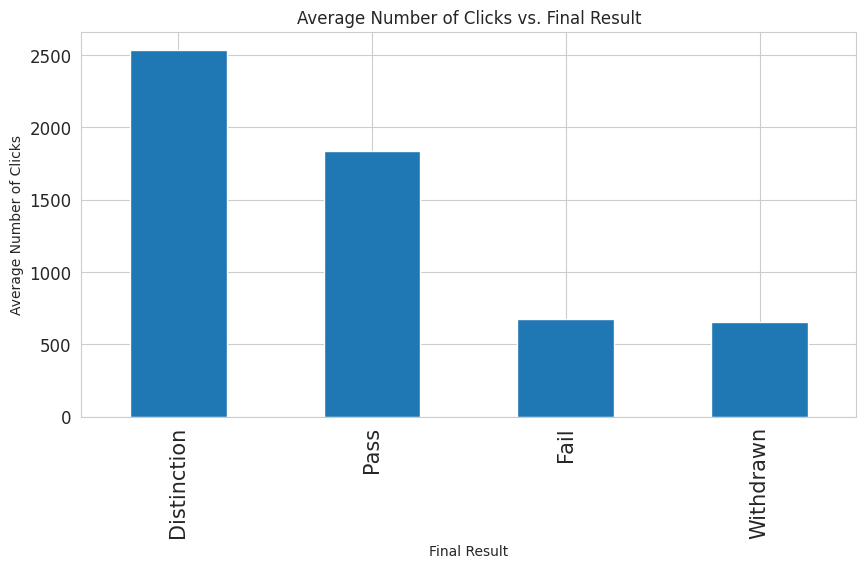

In [53]:
# Examining the relationship between the number of clicks and the final result of students.
# This plot aims to show how student interaction (measured by clicks) correlates with their academic outcomes.

# Set the figure size for the plot
plt.figure(figsize=(10, 5))

# Set the rotation and font size for the x-axis ticks
plt.xticks(rotation=90, fontsize=15)

# Set the rotation and font size for the y-axis ticks
plt.yticks(rotation=0, fontsize=12)

# Set the style of the seaborn plot to whitegrid
sns.set_style("whitegrid")

# Group the student data by their final result and calculate the mean number of clicks after the course started
# Sort the results in descending order
clicks_vs_result = student_info.groupby('final_result')['After_Clicks'].mean().sort_values(ascending=False)

# Plot the mean number of clicks for each final result category
clicks_vs_result.plot(kind='bar')

# Add a title to the plot
plt.title("Average Number of Clicks vs. Final Result")

# Add labels to the x and y axes
plt.xlabel("Final Result")
plt.ylabel("Average Number of Clicks")

# Display the plot
plt.show()


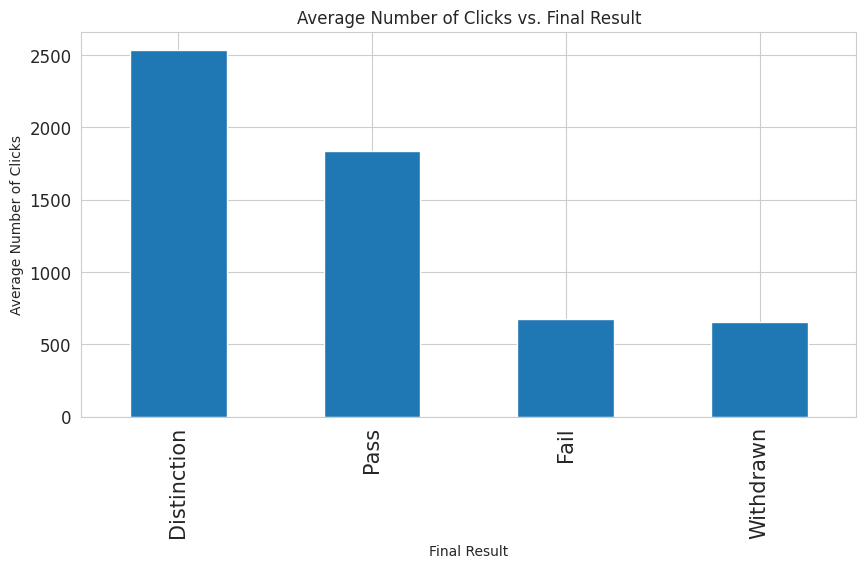

In [54]:
# Examining the relationship between the number of clicks and the final result of students.
# This plot aims to show how student interaction (measured by clicks) correlates with their academic outcomes.

# Set the figure size for the plot
plt.figure(figsize=(10, 5))

# Set the rotation and font size for the x-axis ticks
plt.xticks(rotation=90, fontsize=15)

# Set the rotation and font size for the y-axis ticks
plt.yticks(rotation=0, fontsize=12)

# Set the style of the seaborn plot to whitegrid
sns.set_style("whitegrid")

# Group the student data by their final result and calculate the mean number of clicks after the course started
# Sort the results in descending order
clicks_vs_result = student_info.groupby('final_result')['After_Clicks'].mean().sort_values(ascending=False)

# Plot the mean number of clicks for each final result category
clicks_vs_result.plot(kind='bar')

# Add a title to the plot
plt.title("Average Number of Clicks vs. Final Result")

# Add labels to the x and y axes
plt.xlabel("Final Result")
plt.ylabel("Average Number of Clicks")

# Display the plot
plt.show()


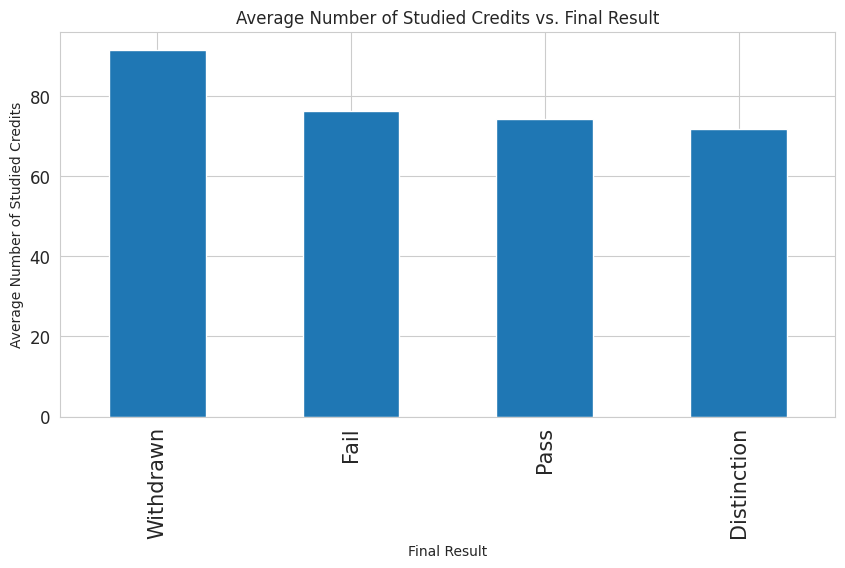

In [55]:
# Analyzing the relationship between the final result and the average number of studied credits.
# This plot aims to investigate how the final result of students correlates with the number of credits they studied.

# Set the figure size for the plot
plt.figure(figsize=(10, 5))

# Set the rotation and font size for the x-axis ticks
plt.xticks(rotation=90, fontsize=15)

# Set the rotation and font size for the y-axis ticks
plt.yticks(rotation=0, fontsize=12)

# Set the style of the seaborn plot to whitegrid
sns.set_style("whitegrid")

# Group the student data by their final result and calculate the mean number of studied credits
# Sort the results in descending order
credits_vs_result = student_info.groupby('final_result')['studied_credits'].mean().sort_values(ascending=False)

# Plot the average number of studied credits for each final result category
credits_vs_result.plot(kind='bar')

# Add a title to the plot
plt.title("Average Number of Studied Credits vs. Final Result")

# Add labels to the x and y axes
plt.xlabel("Final Result")
plt.ylabel("Average Number of Studied Credits")

# Display the plot
plt.show()


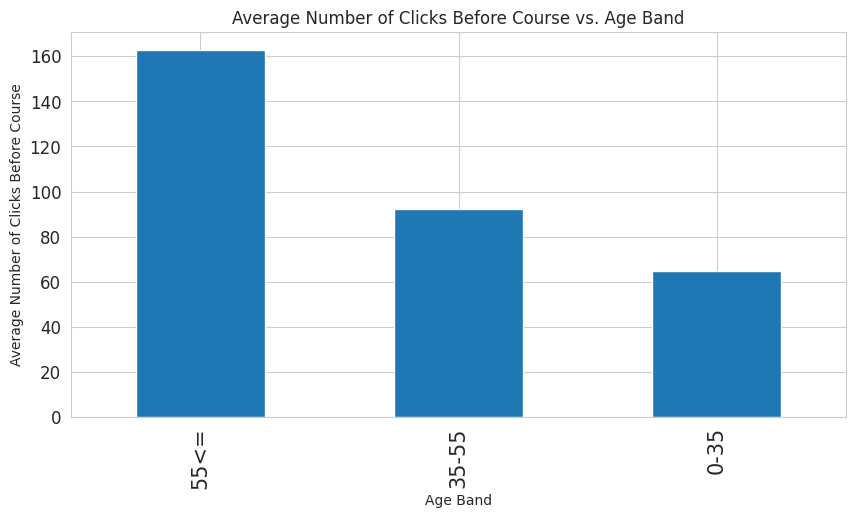

In [56]:
# Analyzing the relationship between the age band of students and the average number of clicks before the course started.
# This plot aims to examine whether there is a difference in the average number of clicks before the course started
# based on the age band of students.

# Set the figure size for the plot
plt.figure(figsize=(10, 5))

# Set the rotation and font size for the x-axis ticks
plt.xticks(rotation=90, fontsize=15)

# Set the rotation and font size for the y-axis ticks
plt.yticks(rotation=0, fontsize=12)

# Set the style of the seaborn plot to whitegrid
sns.set_style("whitegrid")

# Group the student data by their age band and calculate the mean number of clicks before the course started
# Sort the results in descending order
clicks_vs_age_band = student_info.groupby('age_band')['Before_Clicks'].mean().sort_values(ascending=False)

# Plot the average number of clicks before the course started for each age band category
clicks_vs_age_band.plot(kind='bar')

# Add a title to the plot
plt.title("Average Number of Clicks Before Course vs. Age Band")

# Add labels to the x and y axes
plt.xlabel("Age Band")
plt.ylabel("Average Number of Clicks Before Course")

# Display the plot
plt.show()


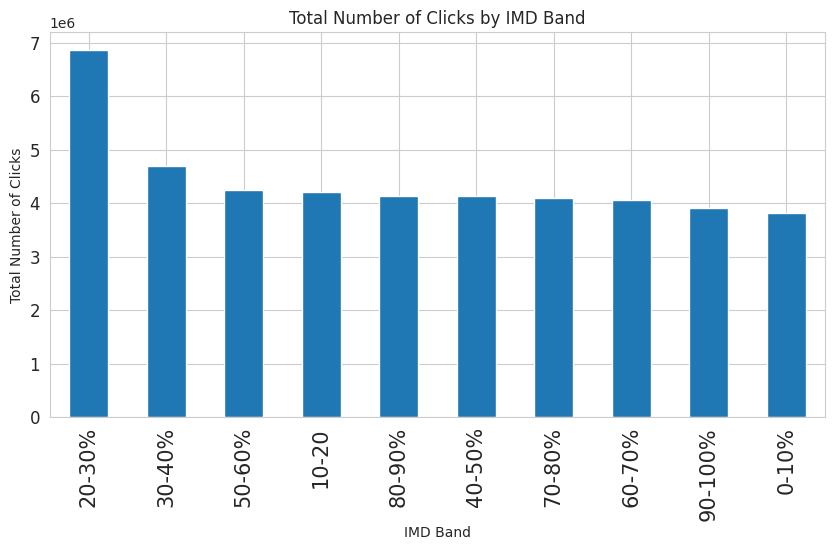

In [57]:
# Analyzing the relationship between the Index of Multiple Deprivation (imd_band) and the total number of clicks.
# This plot aims to examine whether there is a difference in the total number of clicks based on the imd_band of students.

# Set the figure size for the plot
plt.figure(figsize=(10, 5))

# Set the rotation and font size for the x-axis ticks
plt.xticks(rotation=90, fontsize=15)

# Set the rotation and font size for the y-axis ticks
plt.yticks(rotation=0, fontsize=12)

# Set the style of the seaborn plot to whitegrid
sns.set_style("whitegrid")

# Group the student data by their imd_band and calculate the total number of clicks
# Sort the results in descending order
clicks_vs_imd_band = student_info.groupby('imd_band')['sum_click'].sum().sort_values(ascending=False)

# Plot the total number of clicks for each imd_band category
clicks_vs_imd_band.plot(kind='bar')

# Add a title to the plot
plt.title("Total Number of Clicks by IMD Band")

# Add labels to the x and y axes
plt.xlabel("IMD Band")
plt.ylabel("Total Number of Clicks")

# Display the plot
plt.show()


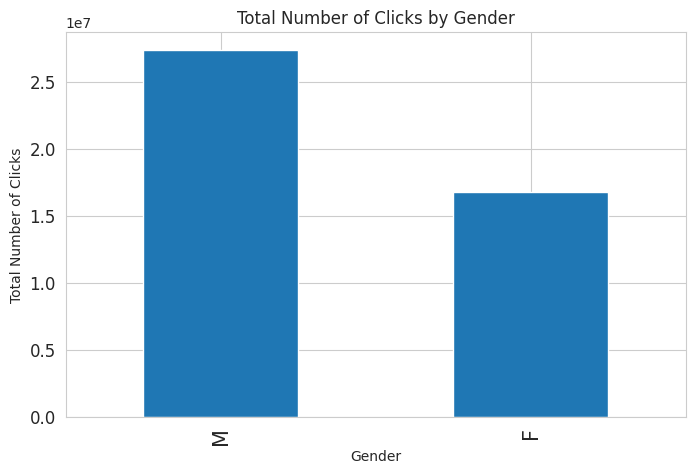

In [58]:
# Analyzing the relationship between gender and the total number of clicks.
# This plot aims to examine whether there is a difference in the total number of clicks based on the gender of students.

# Set the figure size for the plot
plt.figure(figsize=(8, 5))

# Set the rotation and font size for the x-axis ticks
plt.xticks(rotation=90, fontsize=15)

# Set the rotation and font size for the y-axis ticks
plt.yticks(rotation=0, fontsize=12)

# Set the style of the seaborn plot to whitegrid
sns.set_style("whitegrid")

# Group the student data by gender and calculate the total number of clicks
# Sort the results in descending order
clicks_vs_gender = student_info.groupby('gender')['sum_click'].sum().sort_values(ascending=False)

# Plot the total number of clicks for each gender category
clicks_vs_gender.plot(kind='bar')

# Add a title to the plot
plt.title("Total Number of Clicks by Gender")

# Add labels to the x and y axes
plt.xlabel("Gender")
plt.ylabel("Total Number of Clicks")

# Display the plot
plt.show()


age_band  final_result
0-35      Pass            8469
          Withdrawn       7381
          Fail            5231
35-55     Pass            3800
          Withdrawn       2721
0-35      Distinction     1863
35-55     Fail            1792
          Distinction     1120
55<=      Pass              92
          Withdrawn         54
          Distinction       41
          Fail              29
Name: id_student, dtype: int64
final_result       Distinction       Fail       Pass  Withdrawn
age_band age_band                                              
0-35     0-35         8.119770  22.798989  36.911611  32.169630
35-55    35-55       11.873211  18.997138  40.284109  28.845542
55<=     55<=        18.981481  13.425926  42.592593  25.000000


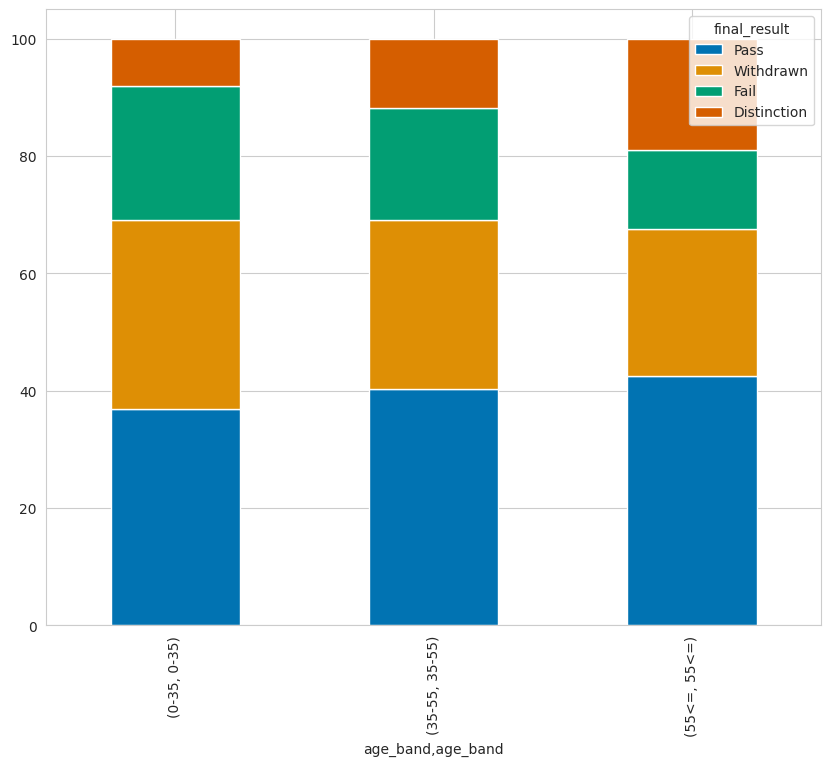

In [59]:
# Analyzing the distribution of final results across different age bands.
# This plot aims to visualize the number of students in each final result category based on their age band.

# Print the number of students in each final result category grouped by age band
print(student_info.groupby(['age_band', 'final_result'])['id_student'].count().sort_values(ascending=False))

# Generate a stacked plot to visualize the distribution of final results across age bands
# The x-axis represents the age bands, the y-axis represents the count of students,
# and different final result categories are represented by different colors in the plot.
stacked_plot(student_info,
             column_one='age_band',         # The primary category for grouping (age bands)
             column_two='final_result',    # The secondary category for grouping (final result categories)
             agg_column='id_student',      # The column to aggregate/count (student IDs)
             plot_size=(10, 8))            # The size of the plot


final_result                                             Distinction  \
highest_education           highest_education                          
A Level or Equivalent       A Level or Equivalent          10.651477   
HE Qualification            HE Qualification               14.735729   
Lower Than A Level          Lower Than A Level              5.525156   
No Formal quals             No Formal quals                 4.610951   
Post Graduate Qualification Post Graduate Qualification    28.115016   

final_result                                                  Fail       Pass  \
highest_education           highest_education                                   
A Level or Equivalent       A Level or Equivalent        19.273763  41.381274   
HE Qualification            HE Qualification             16.701903  41.437632   
Lower Than A Level          Lower Than A Level           26.037392  33.325733   
No Formal quals             No Formal quals              27.377522  25.072046   
Post Grad

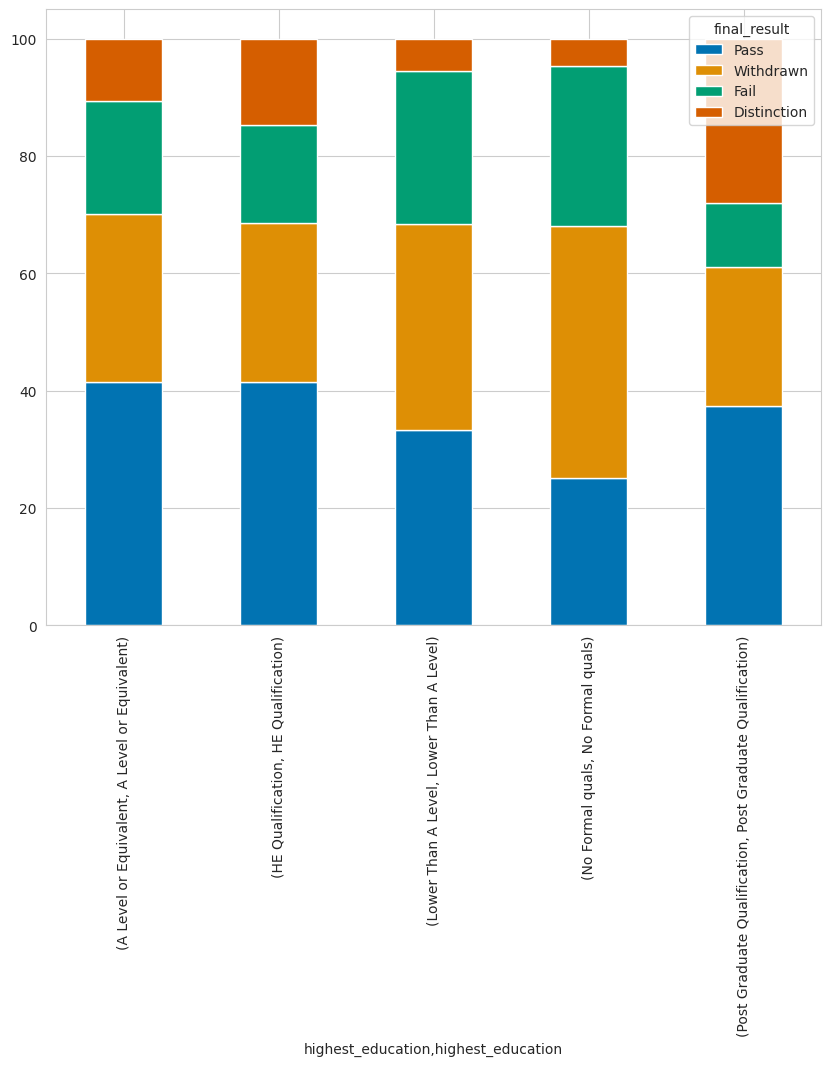

In [60]:
# Generating a stacked plot to compare the pass/fail ratios within each category of highest education level.
# The plot visualizes the relationship between highest education level and final result (pass/fail).
# It shows the distribution of pass and fail outcomes across different education levels.

stacked_plot(data=student_info, column_one='highest_education', column_two='final_result',agg_column='id_student', plot_size=(10, 8))


In [61]:
pip install seaborn


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame
import pandas as pd

In [63]:
# Analyzing the unique values in the 'highest_education' column of the 'student_info' dataframe.
# This step helps understand the different categories present in the 'highest_education' column.

# Print the unique values in the 'highest_education' column
print(student_info['highest_education'].unique())


['HE Qualification' 'A Level or Equivalent' 'Lower Than A Level'
 'Post Graduate Qualification' 'No Formal quals']


In [64]:
# Manipulating the 'highest_education' feature to create two categories: higher education and lower education.
# Categories 'A Level or Equivalent', 'Lower Than A Level', and 'No Formal quals' are grouped as lower education (assigned as 0),
# while all other categories are grouped as higher education (assigned as 1).

student_info['highest_education'] = [0 if education in ['A Level or Equivalent', 'Lower Than A Level', 'No Formal quals']
                                    else 1 for education in student_info['highest_education']]



final_result                         Distinction       Fail       Pass  \
highest_education highest_education                                      
0                 0                     8.127042  22.606171  37.328494   
1                 1                    15.566131  16.339480  41.185802   

final_result                         Withdrawn  
highest_education highest_education             
0                 0                  31.938294  
1                 1                  26.908586  


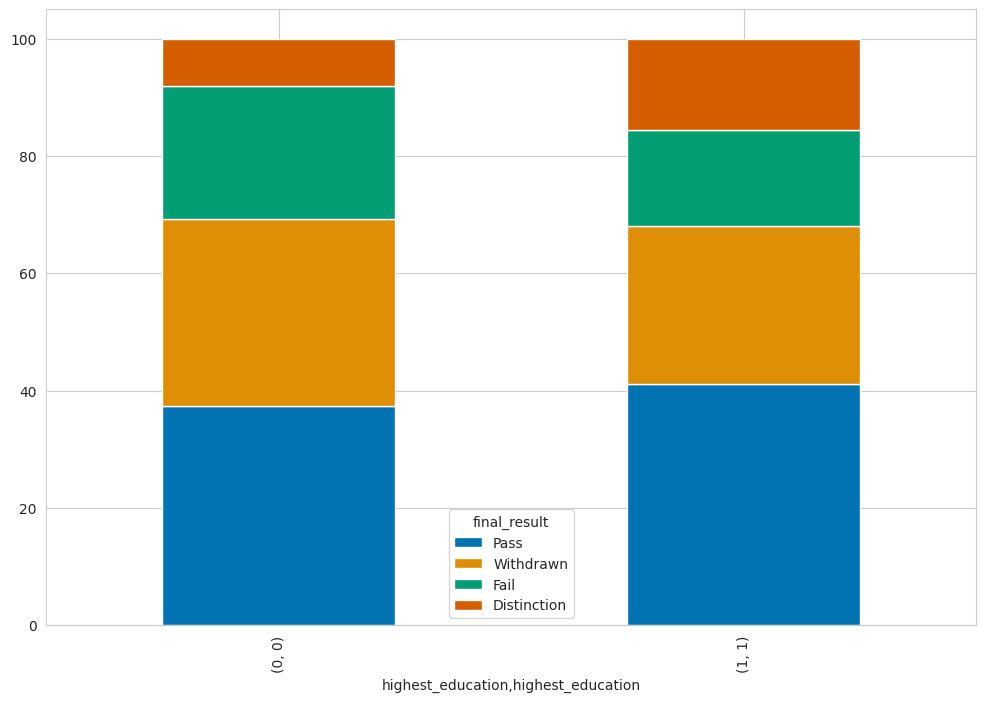

In [65]:
# Analyzing the distribution of final results across different levels of highest education.
# This plot aims to visualize the number of students in each final result category based on their highest education level.

# Generate a stacked plot to visualize the distribution of final results across highest education levels
# The x-axis represents the highest education levels, the y-axis represents the count of students,
# and different final result categories are represented by different colors in the plot.
stacked_plot(data=student_info,
             column_one='highest_education',   # The primary category for grouping (highest education levels)
             column_two='final_result',        # The secondary category for grouping (final result categories)
             agg_column='id_student',          # The column to aggregate/count (student IDs)
             plot_size=(12, 8))                # The size of the plot


final_result                               Distinction       Fail       Pass  \
region               region                                                    
East Anglian Region  East Anglian Region      9.790419  20.898204  39.191617   
East Midlands Region East Midlands Region     8.456660  19.534884  37.251586   
Ireland              Ireland                  8.277027  22.043919  46.621622   
London Region        London Region            8.177861  23.134328  34.172886   
North Region         North Region            12.616566  17.937466  37.904553   
North Western Region North Western Region     7.329663  24.225740  32.863042   
Scotland             Scotland                 9.518282  24.724318  39.437028   
South East Region    South East Region       11.558503  17.764093  39.933681   
South Region         South Region            10.769728  17.593790  41.623545   
South West Region    South West Region       10.837438  19.088670  38.957307   
Wales                Wales              

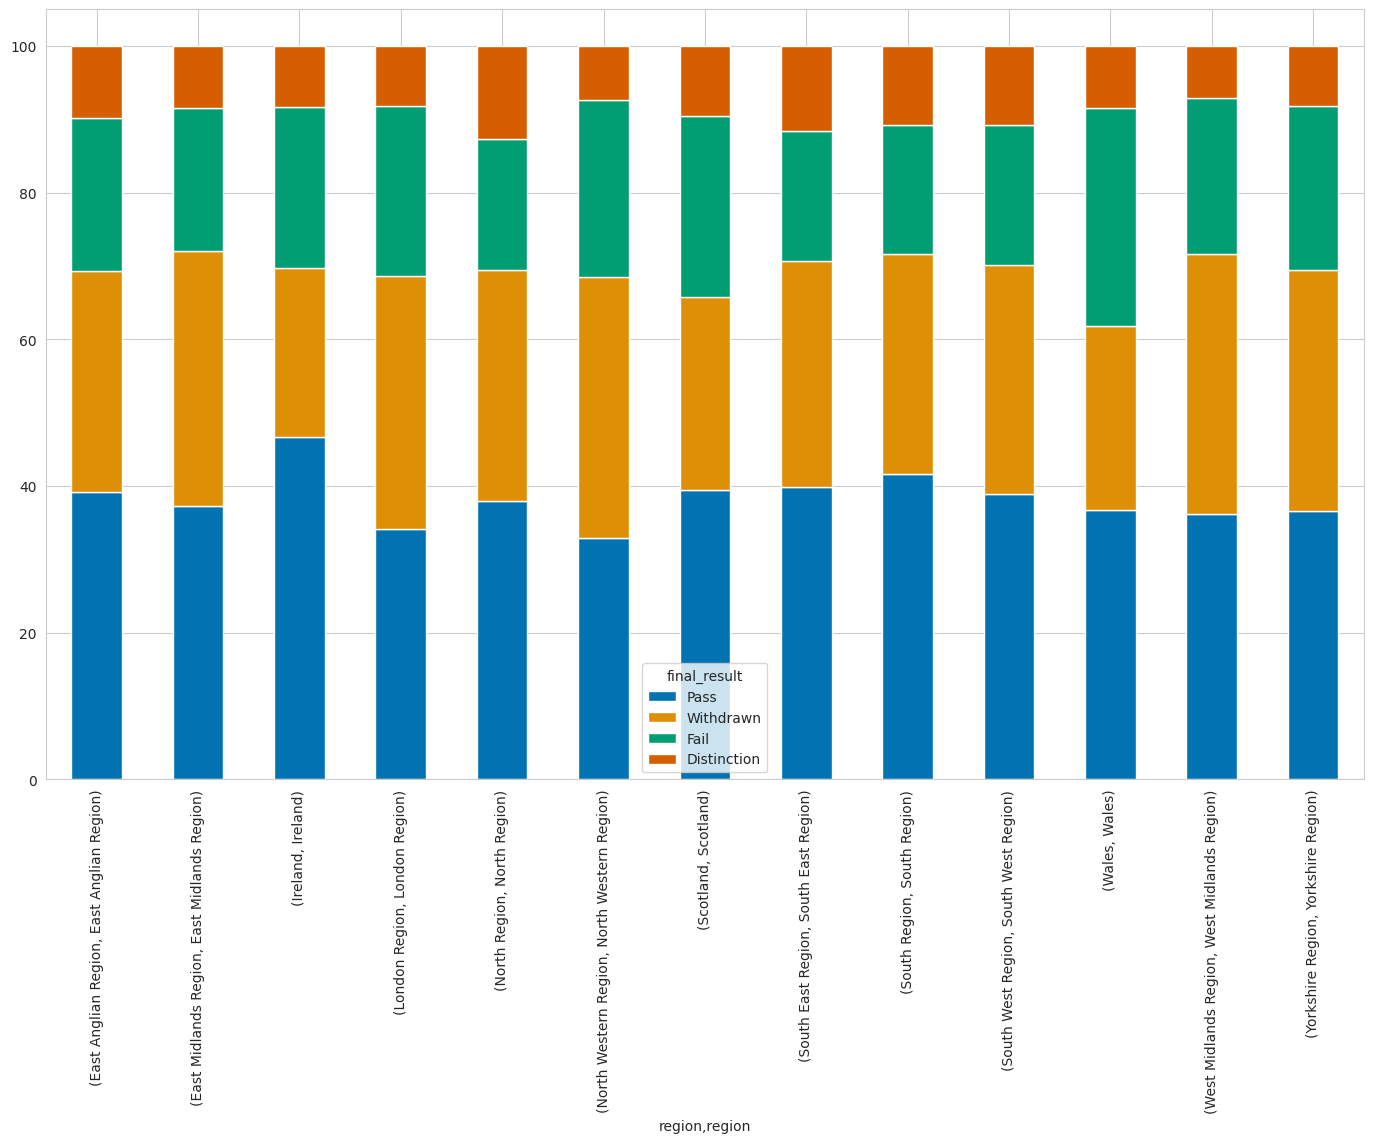

In [66]:
# Analyzing the distribution of final results across different regions.
# This plot aims to visualize the failure and withdrawal rates for students from different regions.

# Generate a stacked plot to visualize the distribution of final results across regions
# The x-axis represents the regions, the y-axis represents the count of students,
# and different final result categories are represented by different colors in the plot.
stacked_plot(data=student_info,
             column_one='region',         # The primary category for grouping (regions)
             column_two='final_result',   # The secondary category for grouping (final result categories)
             agg_column='id_student',     # The column to aggregate/count (student IDs)
             plot_size=(17, 10))           # The size of the plot

# Observing the plot, we can see that the failure and withdrawal rates are similar across all regions.


final_result       Distinction       Fail       Pass  Withdrawn
imd_band imd_band                                              
0-10%    0-10%        5.073996  27.665358  30.081546  37.179100
10-20    10-20        5.432309  25.938567  33.191126  35.437998
20-30%   20-30%       9.695698  20.755509  36.873033  32.675761
30-40%   30-40%       8.900819  22.153151  38.005086  30.940944
40-50%   40-50%       8.998771  21.406634  37.592138  32.002457
50-60%   50-60%       9.507042  22.439181  39.276569  28.777209
60-70%   60-70%      10.292599  18.519793  41.617900  29.569707
70-80%   70-80%      10.871830  20.805835  40.639111  27.683223
80-90%   80-90%      11.875453  17.921796  42.179580  28.023172
90-100%  90-100%     14.116719  16.600946  43.414826  25.867508


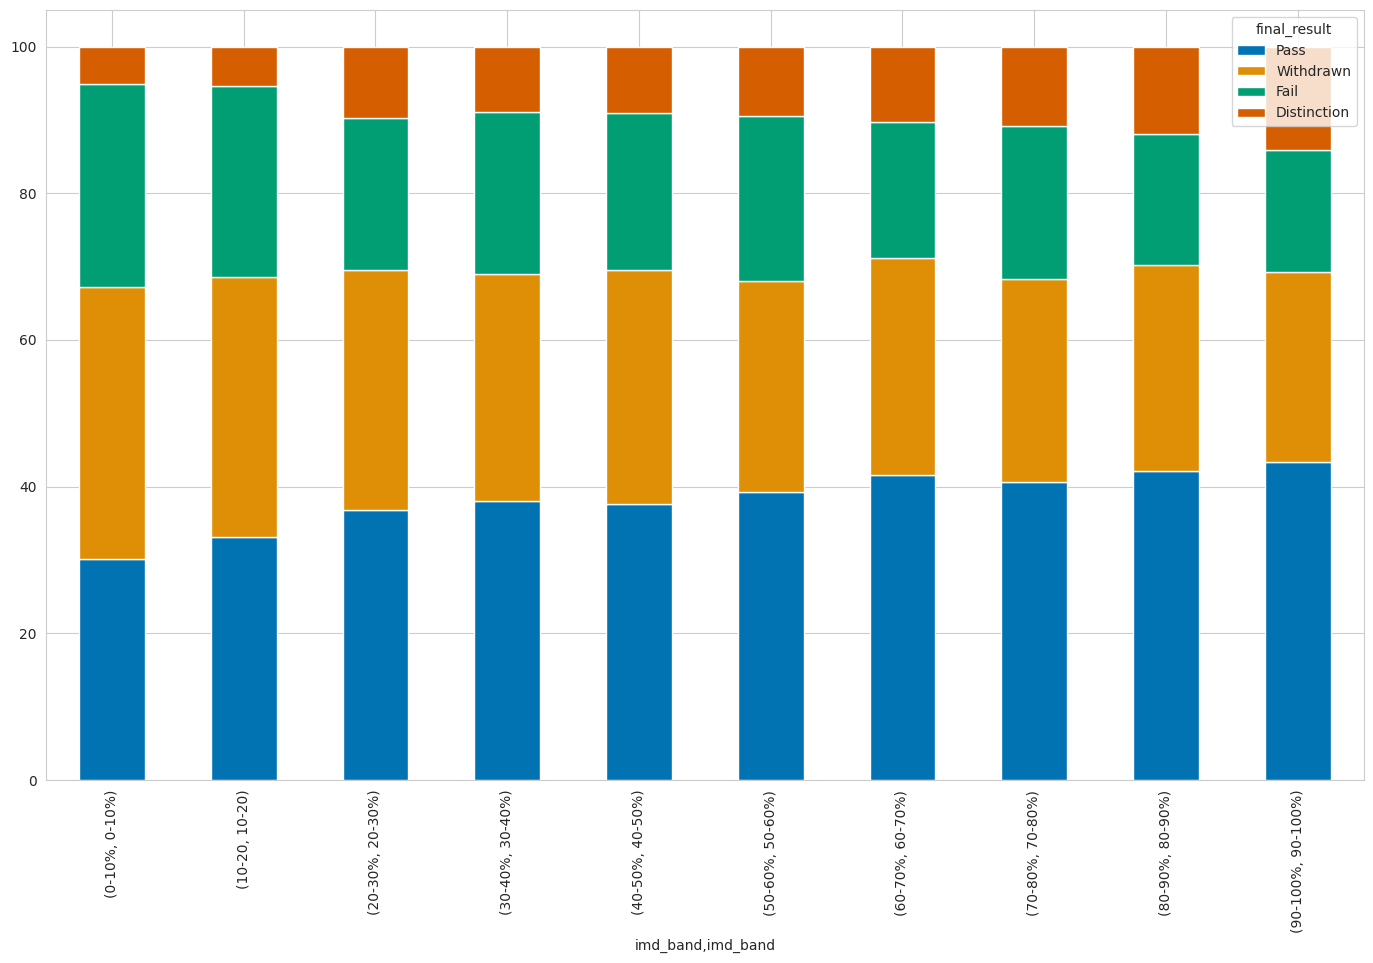

In [67]:
# Analyzing the distribution of final results across different IMD (Index of Multiple Deprivation) bands.
# This plot aims to visualize how final results vary among students from different IMD bands.

# Generate a stacked plot to visualize the distribution of final results across IMD bands
# The x-axis represents the IMD bands, the y-axis represents the count of students,
# and different final result categories are represented by different colors in the plot.
stacked_plot(data=student_info,
             column_one='imd_band',        # The primary category for grouping (IMD bands)
             column_two='final_result',    # The secondary category for grouping (final result categories)
             agg_column='id_student',      # The column to aggregate/count (student IDs)
             plot_size=(17, 10))            # The size of the plot

# Observing the plot, we can analyze the variation in final results among students from different IMD bands.


final_result   Distinction       Fail       Pass  Withdrawn
gender gender                                              
F      F          9.471396  21.083028  38.965892  30.479685
M      M          9.118881  22.092308  37.068531  31.720280


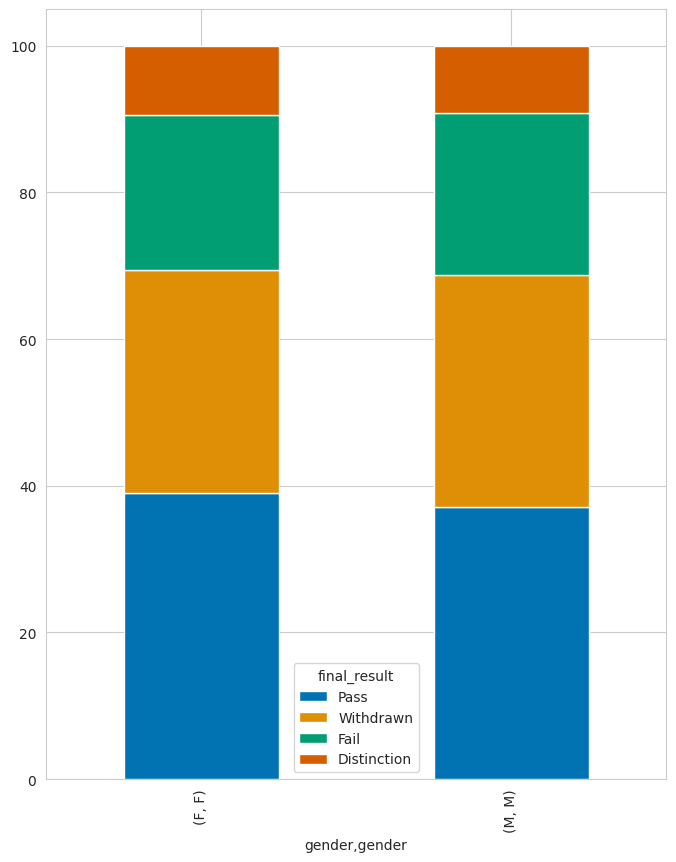

In [68]:
# Analyze the distribution of final results across different genders.
# This plot aims to visualize the number of students in each final result category based on gender.
# The x-axis represents genders, the y-axis represents the count of students,
# and different final result categories are represented by different colors in the plot.

stacked_plot(student_info,
             column_one='gender',       # The primary category for grouping (genders)
             column_two='final_result', # The secondary category for grouping (final result categories)
             agg_column='id_student',   # The column to aggregate/count (student IDs)
             plot_size=(8, 10))         # The size of the plot


final_result           Distinction       Fail       Pass  Withdrawn
disability disability                                              
N          N              9.517823  21.543376  38.659146  30.279656
Y          Y              7.048040  22.503161  31.099874  39.348925


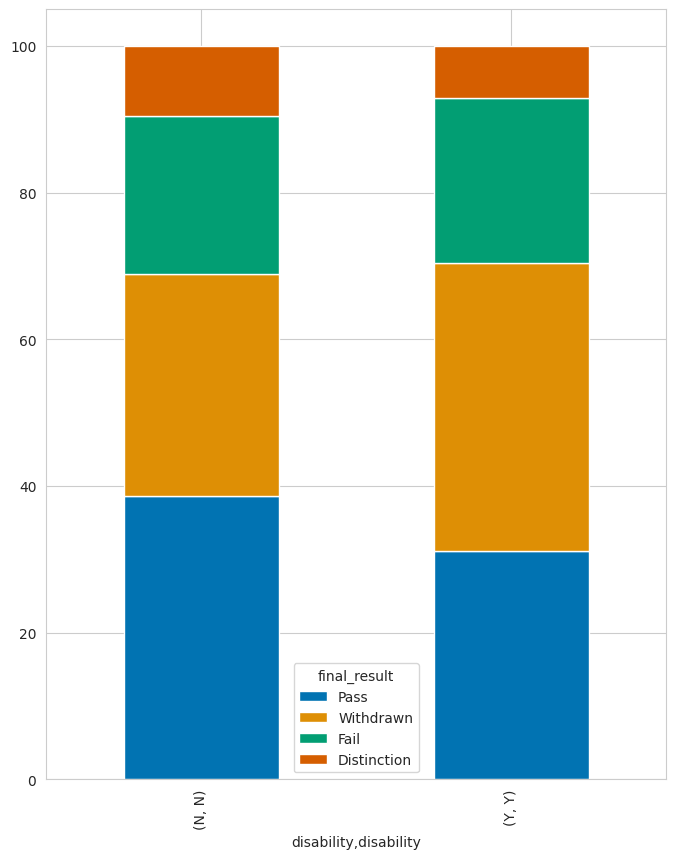

In [69]:
# The following plot shows the distribution of final results by disability status.
# The x-axis represents the disability status, the y-axis represents the count of students,
# and different final result categories are represented by different colors in the plot.
# We observe that the withdrawal rate is higher among people with disabilities.

stacked_plot(student_info,
             column_one='disability',    # The primary category for grouping (disability status)
             column_two='final_result',  # The secondary category for grouping (final result categories)
             agg_column='id_student',    # The column to aggregate/count (student IDs)
             plot_size=(8, 10))          # The size of the plot


###### Combining Student Info with the Student Registration Table

In [70]:
# Drop the 'date_unregistration' column from the student_registration_merge_courses DataFrame
student_registration_merge_courses = student_registration_merge_courses.drop('date_unregistration', axis=1)

# Merge student_registration_merge_courses with student_info based on 'code_module', 'code_presentation', and 'id_student'
# This will add additional information from the courses data to the student_info DataFrame
student_info = student_info.merge(student_registration_merge_courses,
                                  on=['code_module', 'code_presentation', 'id_student'],
                                  how='left')


final_result                   Distinction       Fail       Pass  Withdrawn
Starting_Month Starting_Month                                              
February       February           8.896541  24.615631  34.769379  31.718450
October        October            9.515046  19.786123  39.885601  30.813231


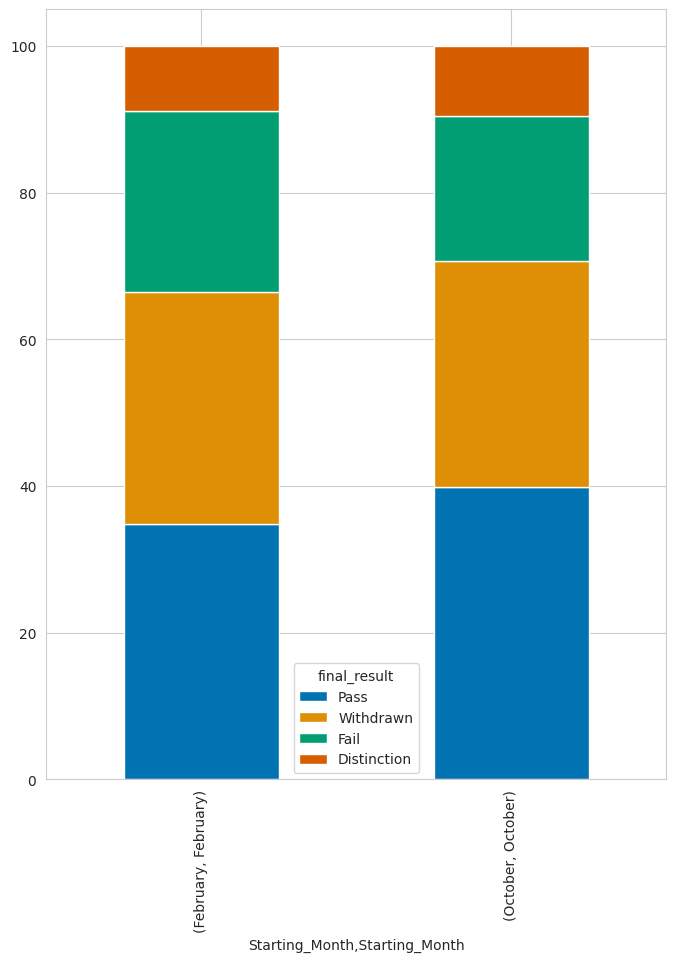

In [71]:
# Following Plot shows us the Result by Session.
# We observe that the Failure Rate is higher for students who started the course in February.
# Additionally, the withdrawal rate is slightly higher for courses starting in February as well.

# Generate a stacked plot to visualize the distribution of final results across different starting months
# The x-axis represents the starting months (February and October), the y-axis represents the count of students,
# and different final result categories are represented by different colors in the plot.
stacked_plot(student_info,
             column_one='Starting_Month',  # The primary category for grouping (starting months)
             column_two='final_result',    # The secondary category for grouping (final result categories)
             agg_column='id_student',      # The column to aggregate/count (student IDs)
             plot_size=(8, 10))            # The size of the plot


final_result                               Distinction       Fail       Pass  \
num_of_prev_attempts num_of_prev_attempts                                      
0                    0                       10.052426  20.164667  39.224517   
1                    1                        4.334647  30.585026  30.221279   
2                    2                        3.259259  34.962963  25.185185   
3                    3                        0.704225  40.140845  21.830986   
4                    4                        0.000000  30.769231  33.333333   
5                    5                        0.000000  46.153846  15.384615   
6                    6                       25.000000  25.000000   0.000000   

final_result                               Withdrawn  
num_of_prev_attempts num_of_prev_attempts             
0                    0                     30.558390  
1                    1                     34.859048  
2                    2                     36.592593  
3   

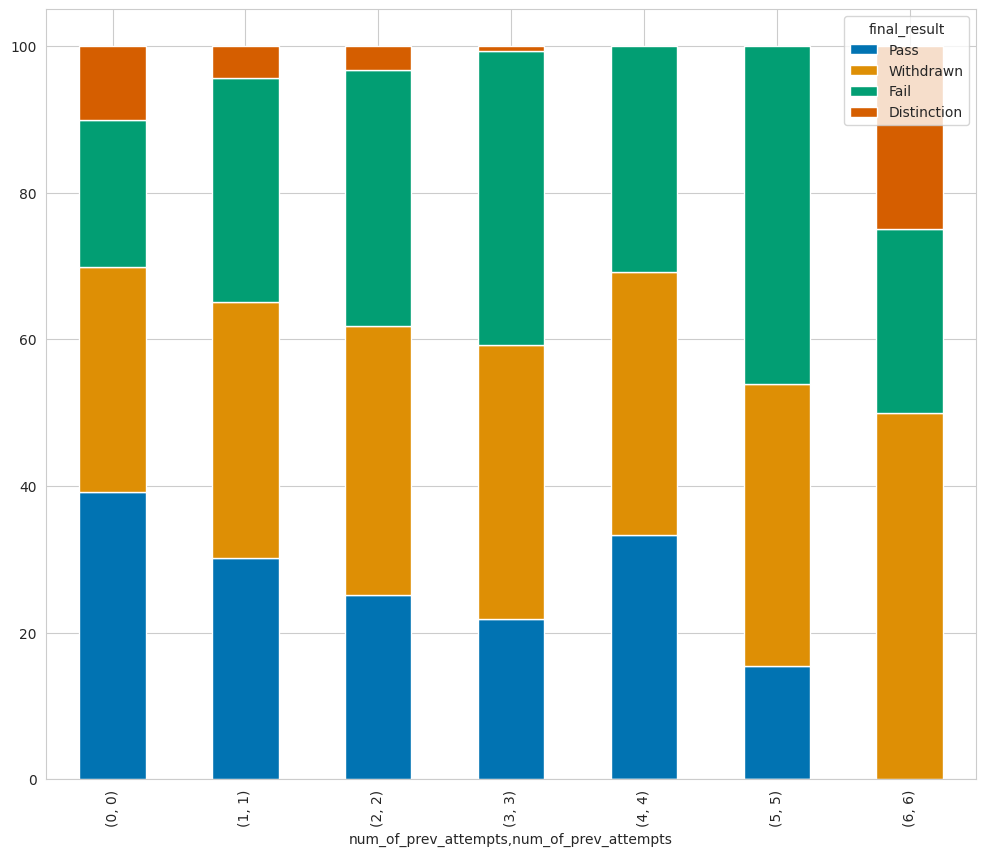

In [72]:
# Analyzing the distribution of final results based on the number of previous course attempts.
# Students with zero previous attempts have the lowest failure and withdrawal rates.

# Generate a stacked plot to visualize the distribution of final results based on the number of previous attempts
# The x-axis represents the number of previous attempts, the y-axis represents the count of students,
# and different final result categories are represented by different colors in the plot.
stacked_plot(student_info,
             column_one='num_of_prev_attempts',   # The primary category for grouping (number of previous attempts)
             column_two='final_result',           # The secondary category for grouping (final result categories)
             agg_column='id_student',             # The column to aggregate/count (student IDs)
             plot_size=(12, 10))                   # The size of the plot


In [73]:
# Manipulating the feature 'num_of_prev_attempts' to create two categories: 0 and 1.
# Category 0 represents no previous attempts, while category 1 represents previous attempts.

student_info['num_of_prev_attempts'] = [0 if attempts == 0 else 1 for attempts in student_info['num_of_prev_attempts']]


final_result                               Distinction       Fail       Pass  \
num_of_prev_attempts num_of_prev_attempts                                      
0                    0                       10.052426  20.164667  39.224517   
1                    1                        4.002876  31.663471  29.074784   

final_result                               Withdrawn  
num_of_prev_attempts num_of_prev_attempts             
0                    0                     30.558390  
1                    1                     35.258869  


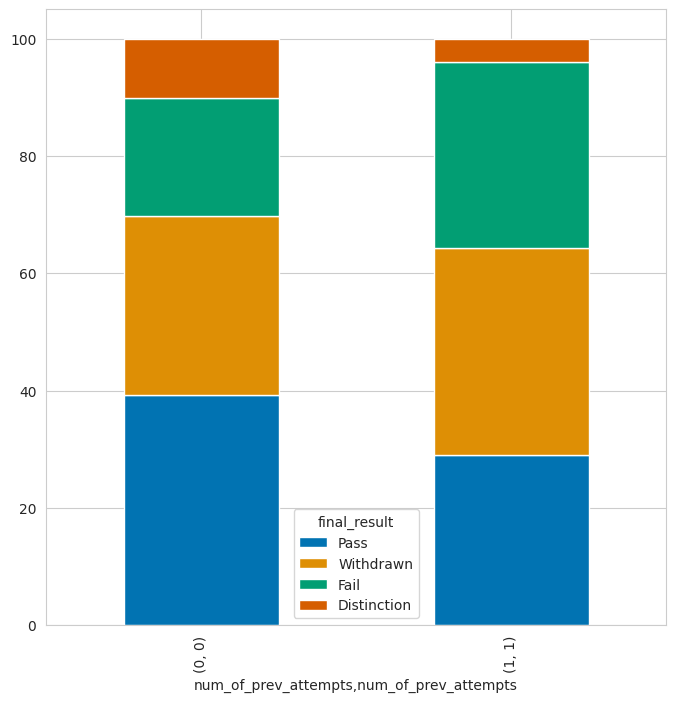

In [74]:
# The following plot illustrates the relationship between the number of previous attempts and final results.
# It indicates that individuals with previous attempts tend to have higher failure and withdrawal rates.

stacked_plot(student_info,
             column_one='num_of_prev_attempts',   # The primary category for grouping (number of previous attempts)
             column_two='final_result',           # The secondary category for grouping (final result categories)
             agg_column='id_student',             # The column to aggregate/count (student IDs)
             plot_size=(8, 8))                   # The size of the plot


final_result             Distinction       Fail       Pass  Withdrawn
code_module code_module                                              
AAA         AAA             5.882353  12.165775  65.106952  16.844920
BBB         BBB             8.559869  22.341636  38.905045  30.193450
CCC         CCC            11.231394  17.613893  26.612539  44.542174
DDD         DDD             6.106505  22.512755  35.507015  35.873724
EEE         EEE            12.133606  19.154738  44.103613  24.608044
FFF         FFF             8.631796  22.043288  38.366400  30.958516
GGG         GGG            15.627466  28.729282  44.119968  11.523283


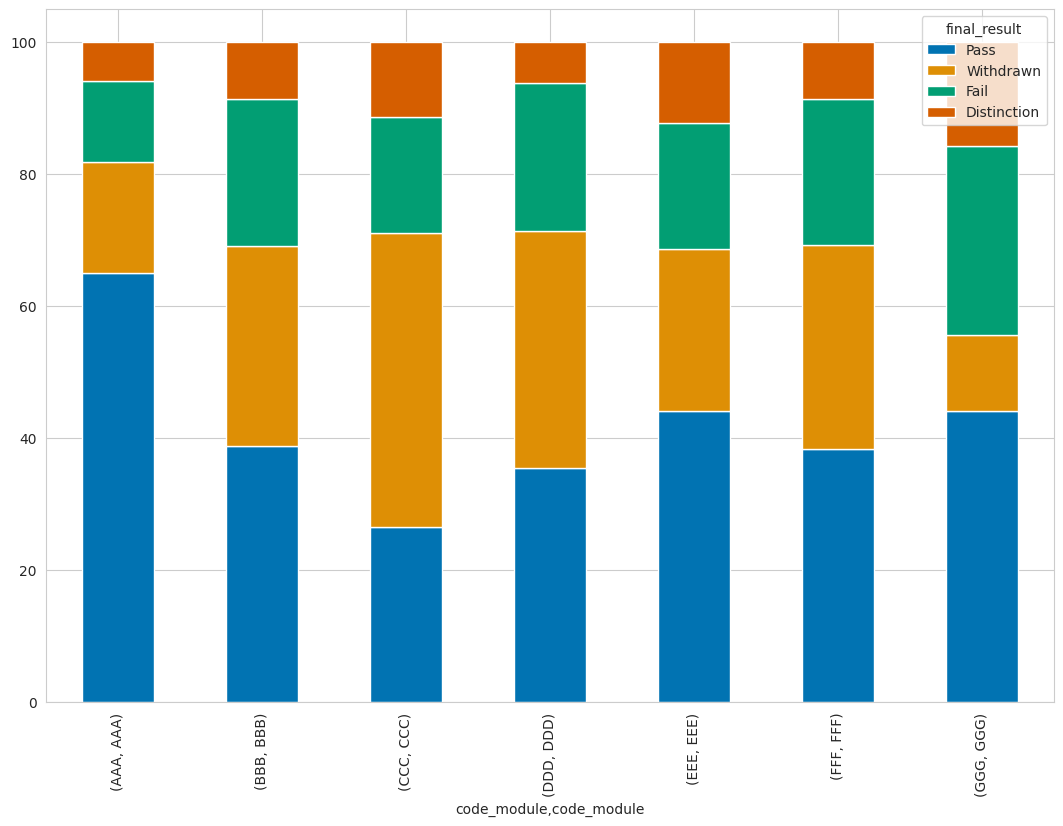

In [75]:
# The following plot depicts the distribution of final results across different course modules.
# It provides insights into the performance of students in each course module.

stacked_plot(student_info,
             column_one='code_module',   # The primary category for grouping (course modules)
             column_two='final_result',  # The secondary category for grouping (final result categories)
             agg_column='id_student',    # The column to aggregate/count (student IDs)
             plot_size=(13, 9))          # The size of the plot


In [76]:
# Create a new column 'Code_Category' to categorize course modules into Social Science and STEM fields.

# Iterate through each row in the dataframe
# If the code module is in the list ['AAA', 'BBB', 'GGG'], assign 'Social_Science' to 'Code_Category'
# Otherwise, assign 'STEM' to 'Code_Category'
student_info['Code_Category'] = ['Social_Science' if module in ['AAA', 'BBB', 'GGG'] else 'STEM'
                                 for module in student_info['code_module']]


final_result                   Distinction       Fail       Pass  Withdrawn
Code_Category  Code_Category                                               
STEM           STEM               8.910382  20.867209  35.879824  34.342585
Social_Science Social_Science     9.981235  23.107855  41.837191  25.073720


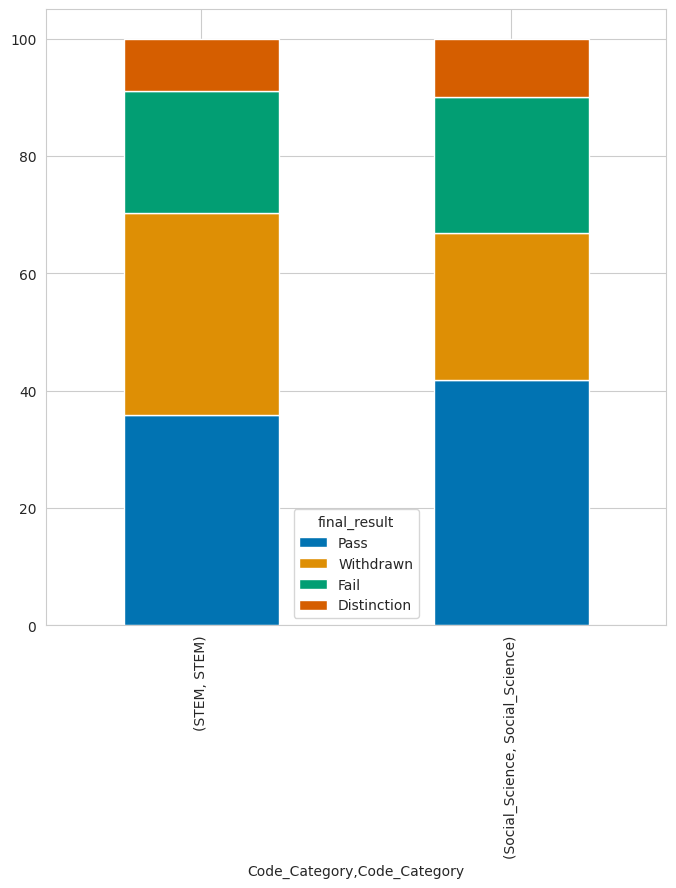

In [77]:
# Analyze the relationship between course category (Social Science vs. STEM) and final result (Pass, Fail, Distinction, Withdrawn).

# Generate a stacked plot to visualize the distribution of final results across course categories
# The x-axis represents the course categories (Social Science vs. STEM)
# The y-axis represents the count of students
# Different final result categories are represented by different colors in the plot
stacked_plot(student_info,
             column_one='Code_Category',    # The primary category for grouping (course categories)
             column_two='final_result',    # The secondary category for grouping (final result categories)
             agg_column='id_student',      # The column to aggregate/count (student IDs)
             plot_size=(8, 8))            # The size of the plot


# DATA PREPARATION
#### Feature Selection
#### Data Encoding
#### Splitting Data

In [78]:
# Dropping irrelevant columns from the dataset
student_info = student_info.drop(['code_presentation', 'id_student', 'Year'], axis=1)


In [79]:
# Convert 'date_registration' column to float
student_info['date_registration'] = student_info['date_registration'].astype(float)


In [80]:
student_info['date_registration'].describe()

count    32593.000000
mean        69.492437
std         49.044122
min          0.000000
25%         29.000000
50%         57.000000
75%        100.000000
max        322.000000
Name: date_registration, dtype: float64

In [81]:
student_info.head()

,code_module,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,After_Clicks,Before_Clicks,date_registration,module_presentation_length,Starting_Month,Code_Category
0,AAA,M,East Anglian Region,1,90-100%,55<=,0,240,N,Pass,934.0,836.0,98.0,159.0,268,October,Social_Science
1,AAA,F,Scotland,1,20-30%,35-55,0,60,N,Pass,1435.0,1220.0,215.0,53.0,268,October,Social_Science
2,AAA,F,North Western Region,0,30-40%,35-55,0,60,Y,Withdrawn,281.0,179.0,102.0,92.0,268,October,Social_Science
3,AAA,F,South East Region,0,50-60%,35-55,0,60,N,Pass,2158.0,1989.0,169.0,52.0,268,October,Social_Science
4,AAA,F,West Midlands Region,0,50-60%,0-35,0,60,N,Pass,1034.0,739.0,295.0,176.0,268,October,Social_Science


In [82]:
# There are two types of categorical variables in the data.
# 1. NOMINAL :- Here there is no order in the categories
# 2. ORDINAL :- When there is order in the category
# List of nominal categorical columns
nominal_columns = ['gender', 'region', 'disability', 'Starting_Month', 'code_module', 'Code_Category']
# List of ordinal categorical columns
ordinal_columns = ['highest_education', 'imd_band', 'age_band']


In [83]:
# Apply label encoding to ordinal columns
data = labelEncoder(student_info, ordinal_columns)

# Apply categorical encoding to nominal columns
data = categorical_encoding(data, nominal_columns)

['M' 'F']
['East Anglian Region' 'Scotland' 'North Western Region'
 'South East Region' 'West Midlands Region' 'Wales' 'North Region'
 'South Region' 'Ireland' 'South West Region' 'East Midlands Region'
 'Yorkshire Region' 'London Region']
['N' 'Y']
['October' 'February']
['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']
['Social_Science' 'STEM']


### In the First case I am assuming Withdrawn Class as Fail and I am building a model whether student will pass or fail.
### In the Second case I will create a labels for dropout vs non-dropout and build a model using that

In [84]:
# To simplify the classification problem, we're converting the final result categories into a binary class model.
# Distinction and Pass are labeled as 0, indicating success, while Withdrawn and Failure are labeled as 1, indicating failure.

data['Result'] = [0 if result in ['Pass', 'Distinction'] else 1 for result in data['final_result']]


In [85]:
# In this step, we're creating a dropout column where withdrawn is considered as dropout, and everything else as no dropout.
# '0' indicates not withdrawn, while '1' indicates withdrawn.

data['dropout'] = [0 if result in ['Pass', 'Distinction', 'Fail'] else 1 for result in data['final_result']]


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   highest_education             32593 non-null  int64  
 1   imd_band                      32593 non-null  int64  
 2   age_band                      32593 non-null  int64  
 3   num_of_prev_attempts          32593 non-null  int64  
 4   studied_credits               32593 non-null  int64  
 5   final_result                  32593 non-null  object 
 6   sum_click                     32593 non-null  float64
 7   After_Clicks                  32593 non-null  float64
 8   Before_Clicks                 32593 non-null  float64
 9   date_registration             32593 non-null  float64
 10  module_presentation_length    32593 non-null  int64  
 11  gender_F                      32593 non-null  bool   
 12  gender_M                      32593 non-null  bool   
 13  r

In [87]:
data.head()

,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,final_result,sum_click,After_Clicks,Before_Clicks,date_registration,module_presentation_length,gender_F,gender_M,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,disability_N,disability_Y,Starting_Month_February,Starting_Month_October,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,Code_Category_STEM,Code_Category_Social_Science,Result,dropout
0,1,9,2,0,240,Pass,934.0,836.0,98.0,159.0,268,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,True,0,0
1,1,2,1,0,60,Pass,1435.0,1220.0,215.0,53.0,268,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,True,0,0
2,0,3,1,0,60,Withdrawn,281.0,179.0,102.0,92.0,268,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,True,1,1
3,0,5,1,0,60,Pass,2158.0,1989.0,169.0,52.0,268,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,True,0,0
4,0,5,0,0,60,Pass,1034.0,739.0,295.0,176.0,268,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,True,False,False,False,False,False,False,False,True,0,0


In [88]:
#  #Exporting the first 4000 rows of the processed data to a CSV file
# data[:6000].to_csv('processed_data_4000.csv', index=False)

In [89]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# # Load the dataset
# data = pd.read_csv("processed_data_4000.csv")

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical features
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Split features and target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Encode target variable if it's categorical (assuming binary classification for simplicity)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape input data for RNN
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Initialize the RNN
model = Sequential()

# Adding the RNN layer
model.add(SimpleRNN(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

# Adding the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the RNN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluating the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/10
815/815 [==============================] - 8s 6ms/step - loss: 0.1023 - accuracy: 0.9696
Epoch 2/10
815/815 [==============================] - 6s 7ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 3/10
815/815 [==============================] - 6s 7ms/step - loss: 6.6894e-04 - accuracy: 1.0000
Epoch 4/10
815/815 [==============================] - 2s 2ms/step - loss: 2.8487e-04 - accuracy: 1.0000
Epoch 5/10
815/815 [==============================] - 2s 2ms/step - loss: 1.4375e-04 - accuracy: 1.0000
Epoch 6/10
815/815 [==============================] - 2s 2ms/step - loss: 7.8843e-05 - accuracy: 1.0000
Epoch 7/10
815/815 [==============================] - 2s 2ms/step - loss: 4.5461e-05 - accuracy: 1.0000
Epoch 8/10
815/815 [==============================] - 3s 3ms/step - loss: 2.7080e-05 - accuracy: 1.0000
Epoch 9/10
815/815 [==============================] - 3s 4ms/step - loss: 1.6458e-05 - accuracy: 1.0000
Epoch 10/10
204/204 [==============================] - 1s 2ms/step - los

In [90]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# # Load the dataset
# data = pd.read_csv("processed_data_4000.csv")

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical features
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Split features and target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Encode target variable if it's categorical (assuming binary classification for simplicity)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape input data for RNN
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Initialize the RNN
model = Sequential()

# Adding the GRU layer
model.add(GRU(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

# Adding the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the RNN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluating the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/10
815/815 [==============================] - 6s 5ms/step - loss: 0.0766 - accuracy: 0.9817
Epoch 2/10
815/815 [==============================] - 3s 4ms/step - loss: 7.8109e-04 - accuracy: 1.0000
Epoch 3/10
815/815 [==============================] - 3s 3ms/step - loss: 1.9563e-04 - accuracy: 1.0000
Epoch 4/10
815/815 [==============================] - 2s 3ms/step - loss: 8.1438e-05 - accuracy: 1.0000
Epoch 5/10
815/815 [==============================] - 2s 3ms/step - loss: 4.0458e-05 - accuracy: 1.0000
Epoch 6/10
815/815 [==============================] - 3s 4ms/step - loss: 2.2042e-05 - accuracy: 1.0000
Epoch 7/10
815/815 [==============================] - 4s 5ms/step - loss: 1.2642e-05 - accuracy: 1.0000
Epoch 8/10
815/815 [==============================] - 6s 7ms/step - loss: 7.4603e-06 - accuracy: 1.0000
Epoch 9/10
815/815 [==============================] - 6s 8ms/step - loss: 4.4964e-06 - accuracy: 1.0000
Epoch 10/10
204/204 [==============================] - 1s 4ms/step -

In [91]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# # Load the dataset
# data = pd.read_csv("processed_data_4000.csv")

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical features
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Split features and target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Encode target variable if it's categorical (assuming binary classification for simplicity)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape input data for RNN
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Initialize the RNN
model = Sequential()

# Adding the LSTM layer
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

# Adding the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the RNN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluating the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/10
815/815 [==============================] - 4s 3ms/step - loss: 0.0947 - accuracy: 0.9816
Epoch 2/10
815/815 [==============================] - 2s 3ms/step - loss: 7.9244e-04 - accuracy: 1.0000
Epoch 3/10
815/815 [==============================] - 2s 3ms/step - loss: 2.0844e-04 - accuracy: 1.0000
Epoch 4/10
815/815 [==============================] - 3s 4ms/step - loss: 8.7877e-05 - accuracy: 1.0000
Epoch 5/10
815/815 [==============================] - 4s 5ms/step - loss: 4.4254e-05 - accuracy: 1.0000
Epoch 6/10
815/815 [==============================] - 2s 3ms/step - loss: 2.4198e-05 - accuracy: 1.0000
Epoch 7/10
815/815 [==============================] - 2s 3ms/step - loss: 1.3901e-05 - accuracy: 1.0000
Epoch 8/10
815/815 [==============================] - 2s 3ms/step - loss: 8.2502e-06 - accuracy: 1.0000
Epoch 9/10
815/815 [==============================] - 2s 3ms/step - loss: 4.9965e-06 - accuracy: 1.0000
Epoch 10/10
204/204 [==============================] - 1s 3ms/step -

# **Applying Random forest Regression**

#Importing libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [93]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical features
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
data

,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,sum_click,After_Clicks,Before_Clicks,date_registration,module_presentation_length,gender_F,gender_M,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,disability_N,disability_Y,Starting_Month_February,Starting_Month_October,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,Code_Category_STEM,Code_Category_Social_Science,Result,dropout,final_result_Fail,final_result_Pass,final_result_Withdrawn
0,1,9,2,0,240,934.0,836.0,98.0,159.0,268,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,True,0,0,False,True,False
1,1,2,1,0,60,1435.0,1220.0,215.0,53.0,268,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,True,0,0,False,True,False
2,0,3,1,0,60,281.0,179.0,102.0,92.0,268,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,True,1,1,False,False,True
3,0,5,1,0,60,2158.0,1989.0,169.0,52.0,268,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,True,0,0,False,True,False
4,0,5,0,0,60,1034.0,739.0,295.0,176.0,268,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,True,False,False,False,False,False,False,False,True,0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,0,1,0,0,30,41.0,39.0,2.0,4.0,269,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True,1,0,True,False,False
32589,0,4,1,0,30,893.0,893.0,0.0,23.0,269,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True,0,0,False,False,False
32590,0,2,0,0,30,312.0,297.0,15.0,129.0,269,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,True,0,0,False,True,False
32591,0,9,1,0,30,275.0,210.0,65.0,49.0,269,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True,1,1,False,False,True


In [94]:
# Fill or drop missing values as appropriate
data.fillna(data.mean(), inplace=True)  # or data.dropna(inplace=True)

In [95]:
# Assuming 'Result' is the target column
# Split features & Target variable

X = data.drop(columns=['Result'])
y = data['Result']

# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [96]:
#SPLITTING THE DATA SET

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
#FEATURE SCALING

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [98]:
#TRAIN THE RANDOM FOREST CLASSIFIER
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [99]:
#MAKE PREDICTIONS AND EVALUATE THE MODEL

# Predict on the test set
y_pred = rf_model.predict(X_test)

Accuracy: 1.0
Confusion Matrix:
[[3051    0]
 [   0 3468]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3051
           1       1.00      1.00      1.00      3468

    accuracy                           1.00      6519
   macro avg       1.00      1.00      1.00      6519
weighted avg       1.00      1.00      1.00      6519



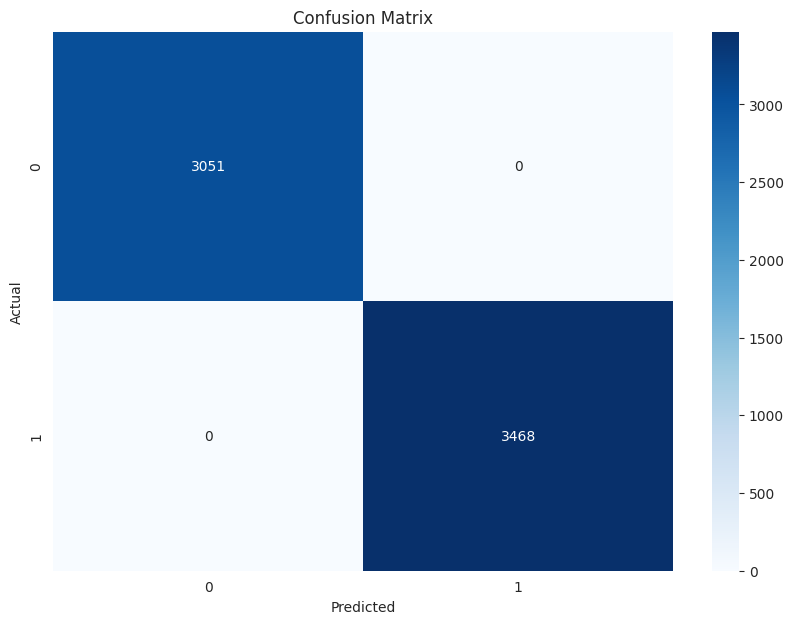

In [100]:
#EVALUATE THE MODEL

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [101]:
#SAVING THE MODEL FOR FUTURE USE

import joblib

# Save the model
joblib.dump(rf_model, 'random_forest_model.pkl')

# Load the model
rf_model = joblib.load('random_forest_model.pkl')

# Applying **Decision Tree Model**

In [102]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
import joblib

In [103]:
print(data.head())
print(data.columns)


   highest_education  imd_band  age_band  num_of_prev_attempts  \
0                  1         9         2                     0   
1                  1         2         1                     0   
2                  0         3         1                     0   
3                  0         5         1                     0   
4                  0         5         0                     0   

   studied_credits  sum_click  After_Clicks  Before_Clicks  date_registration  \
0              240      934.0         836.0           98.0              159.0   
1               60     1435.0        1220.0          215.0               53.0   
2               60      281.0         179.0          102.0               92.0   
3               60     2158.0        1989.0          169.0               52.0   
4               60     1034.0         739.0          295.0              176.0   

   module_presentation_length  gender_F  gender_M  region_East Anglian Region  \
0                         268     F

In [104]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical features
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [105]:
# Fill or drop missing values as appropriate
data.fillna(data.mean(), inplace=True)  # or data.dropna(inplace=True)


In [106]:
# Assuming 'final_result' is the target column
target_column = 'Result'  # Adjust the column name as needed

if target_column not in data.columns:
    print(f"Column '{target_column}' not found in the dataset. Available columns are: {data.columns}")
else:
    # Separate features and target variable
    X = data.drop(columns=[target_column])
    y = data[target_column]

    # Encode the target variable
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

In [107]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

In [109]:
#Training Decision Tree Classifier



Index(['highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'sum_click', 'After_Clicks', 'Before_Clicks',
       'date_registration', 'module_presentation_length', 'gender_F',
       'gender_M', 'region_East Anglian Region', 'region_East Midlands Region',
       'region_Ireland', 'region_London Region', 'region_North Region',
       'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Yorkshire Region',
       'disability_N', 'disability_Y', 'Starting_Month_February',
       'Starting_Month_October', 'code_module_AAA', 'code_module_BBB',
       'code_module_CCC', 'code_module_DDD', 'code_module_EEE',
       'code_module_FFF', 'code_module_GGG', 'Code_Category_STEM',
       'Code_Category_Social_Science', 'Result', 'dropout',
       'final_result_Fail', 'final_result_Pass', 'final_result_Withdraw

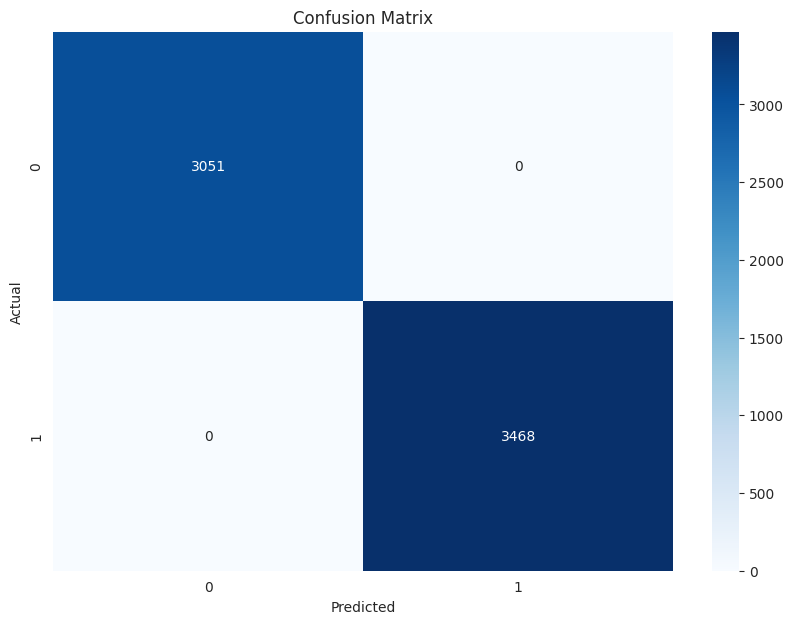

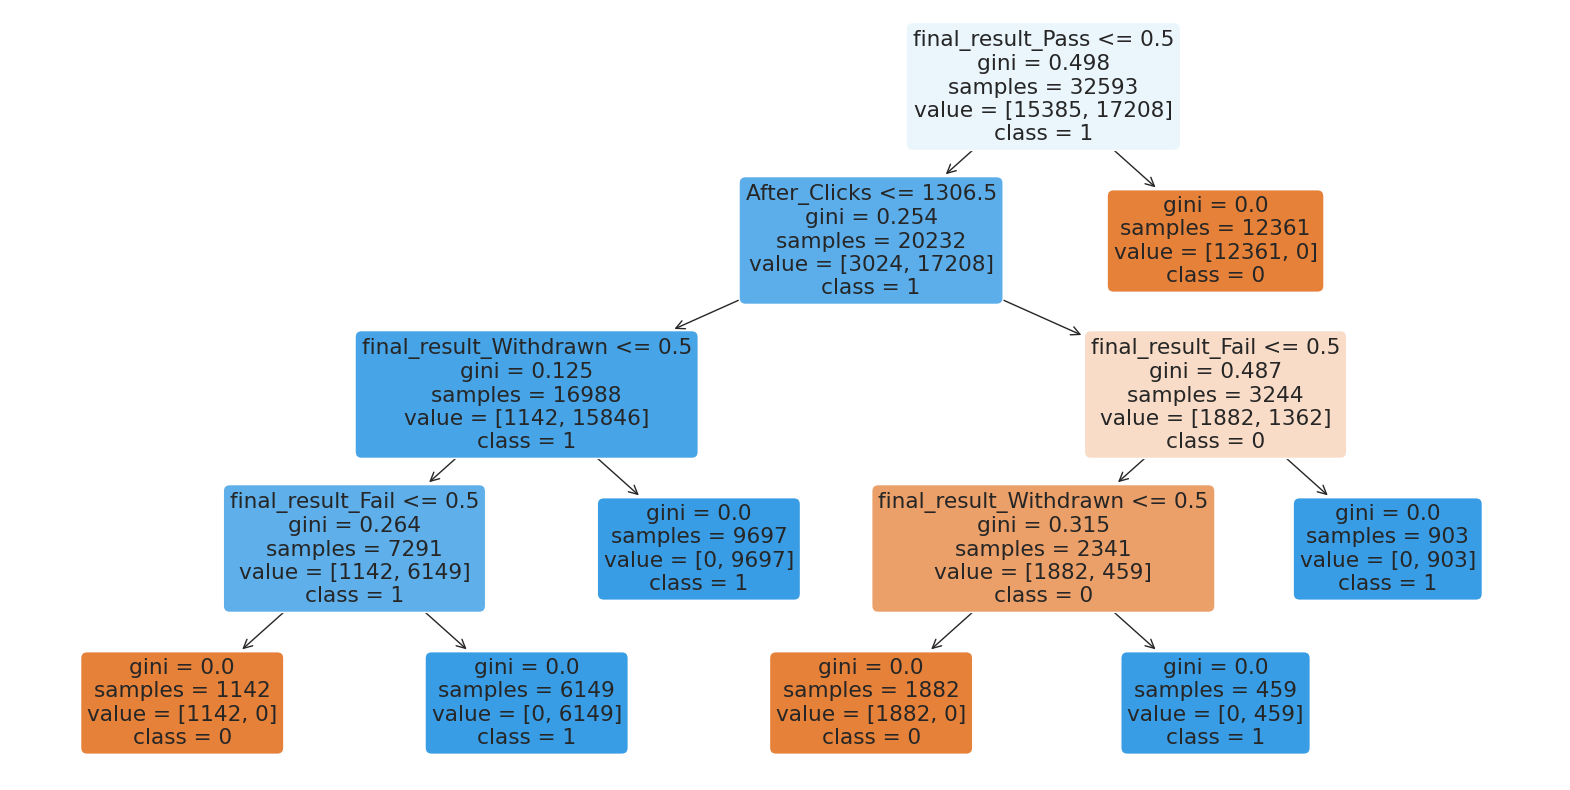

In [110]:


# Check the column names
print(data.columns)

# Adjust this line if the column name is different or has spaces
target_column = 'Result'  # Adjust the column name as needed

if target_column not in data.columns:
    print(f"Column '{target_column}' not found in the dataset. Available columns are: {data.columns}")
else:
    # Identify categorical columns
    categorical_columns = data.select_dtypes(include=['object']).columns

    # Apply one-hot encoding to categorical features
    data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

    # Fill or drop missing values as appropriate
    data.fillna(data.mean(), inplace=True)  # or data.dropna(inplace=True)

    # Separate features and target variable
    X = data.drop(columns=[target_column])
    y = data[target_column]

    # Encode the target variable
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Split the dataset into Training and Test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Initialize and train the Decision Tree classifier
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)

    # Make predictions
    y_pred = dt_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')

    conf_matrix = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:')
    print(conf_matrix)

    class_report = classification_report(y_test, y_pred)
    print('Classification Report:')
    print(class_report)

    # Plot Confusion Matrix
    plt.figure(figsize=(10,7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()



# Sample data preparation (assuming you have a DataFrame `df` and target variable `target`)
# X = df.drop(columns=['target_column'])
# y = df['target_column']

# Encoding the target labels if they are categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train the decision tree classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X, y_encoded)

# Convert class names to strings
class_names = list(map(str, label_encoder.classes_))

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=class_names, rounded=True)
plt.show()


